# Исследование объявлений о продаже квартир

## Описание проекта 


В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**
1. Определить рыночную стоимость объектов недвижимости;
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность;
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования:**
1. Получить данные из файлы '/datasets/real_estate_data.csv'. Поскольку о качестве данных ничего не известно, то перед тем, как приступать к выполнению целей исследования, необходимо провести обзор данных;
2. Проверить данные на ошибки и оценить их влияние на исследование. На этапе предобработки данных исправить все ошибки в данных, которые не приведут к искажению результатов исследования. Создить необходимые столбцы и приступить к проведению исследовательского анализа.

Таким образом, исследование пройдет в семь этапов:
* Обзор данных;
* Предобработка данных;
* Расчеты и добавление результатов в таблицу;
* Проведение анализа для Ленинградской области;
* Проведение анализа для Санкт-Петербруга;
* Провести анализ различия факторов, которые влияют на ценообразование стоимости квартир;
* Написание общего вывода.

## Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### 1. Откройте файл с данными и изучите общую информацию. 

1. Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas. <br/>
2. 
Изучите общую информацию о полученном датафрейме
3. 
Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

#### 1. Загрузите данные из csv-файла в датафрейм с помощью библиотеки pandas.

In [1]:
# Загружаем данные из csv-файла в датафрейм и импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats

try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

#### 2. Изучите общую информацию о полученном датафрейме.

In [2]:
# Изучаем общую информацию о датафрейме
df.shape

(23699, 22)

In [3]:
# Изучаем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Изучаем общую информацию о датафрейме
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### 3. Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

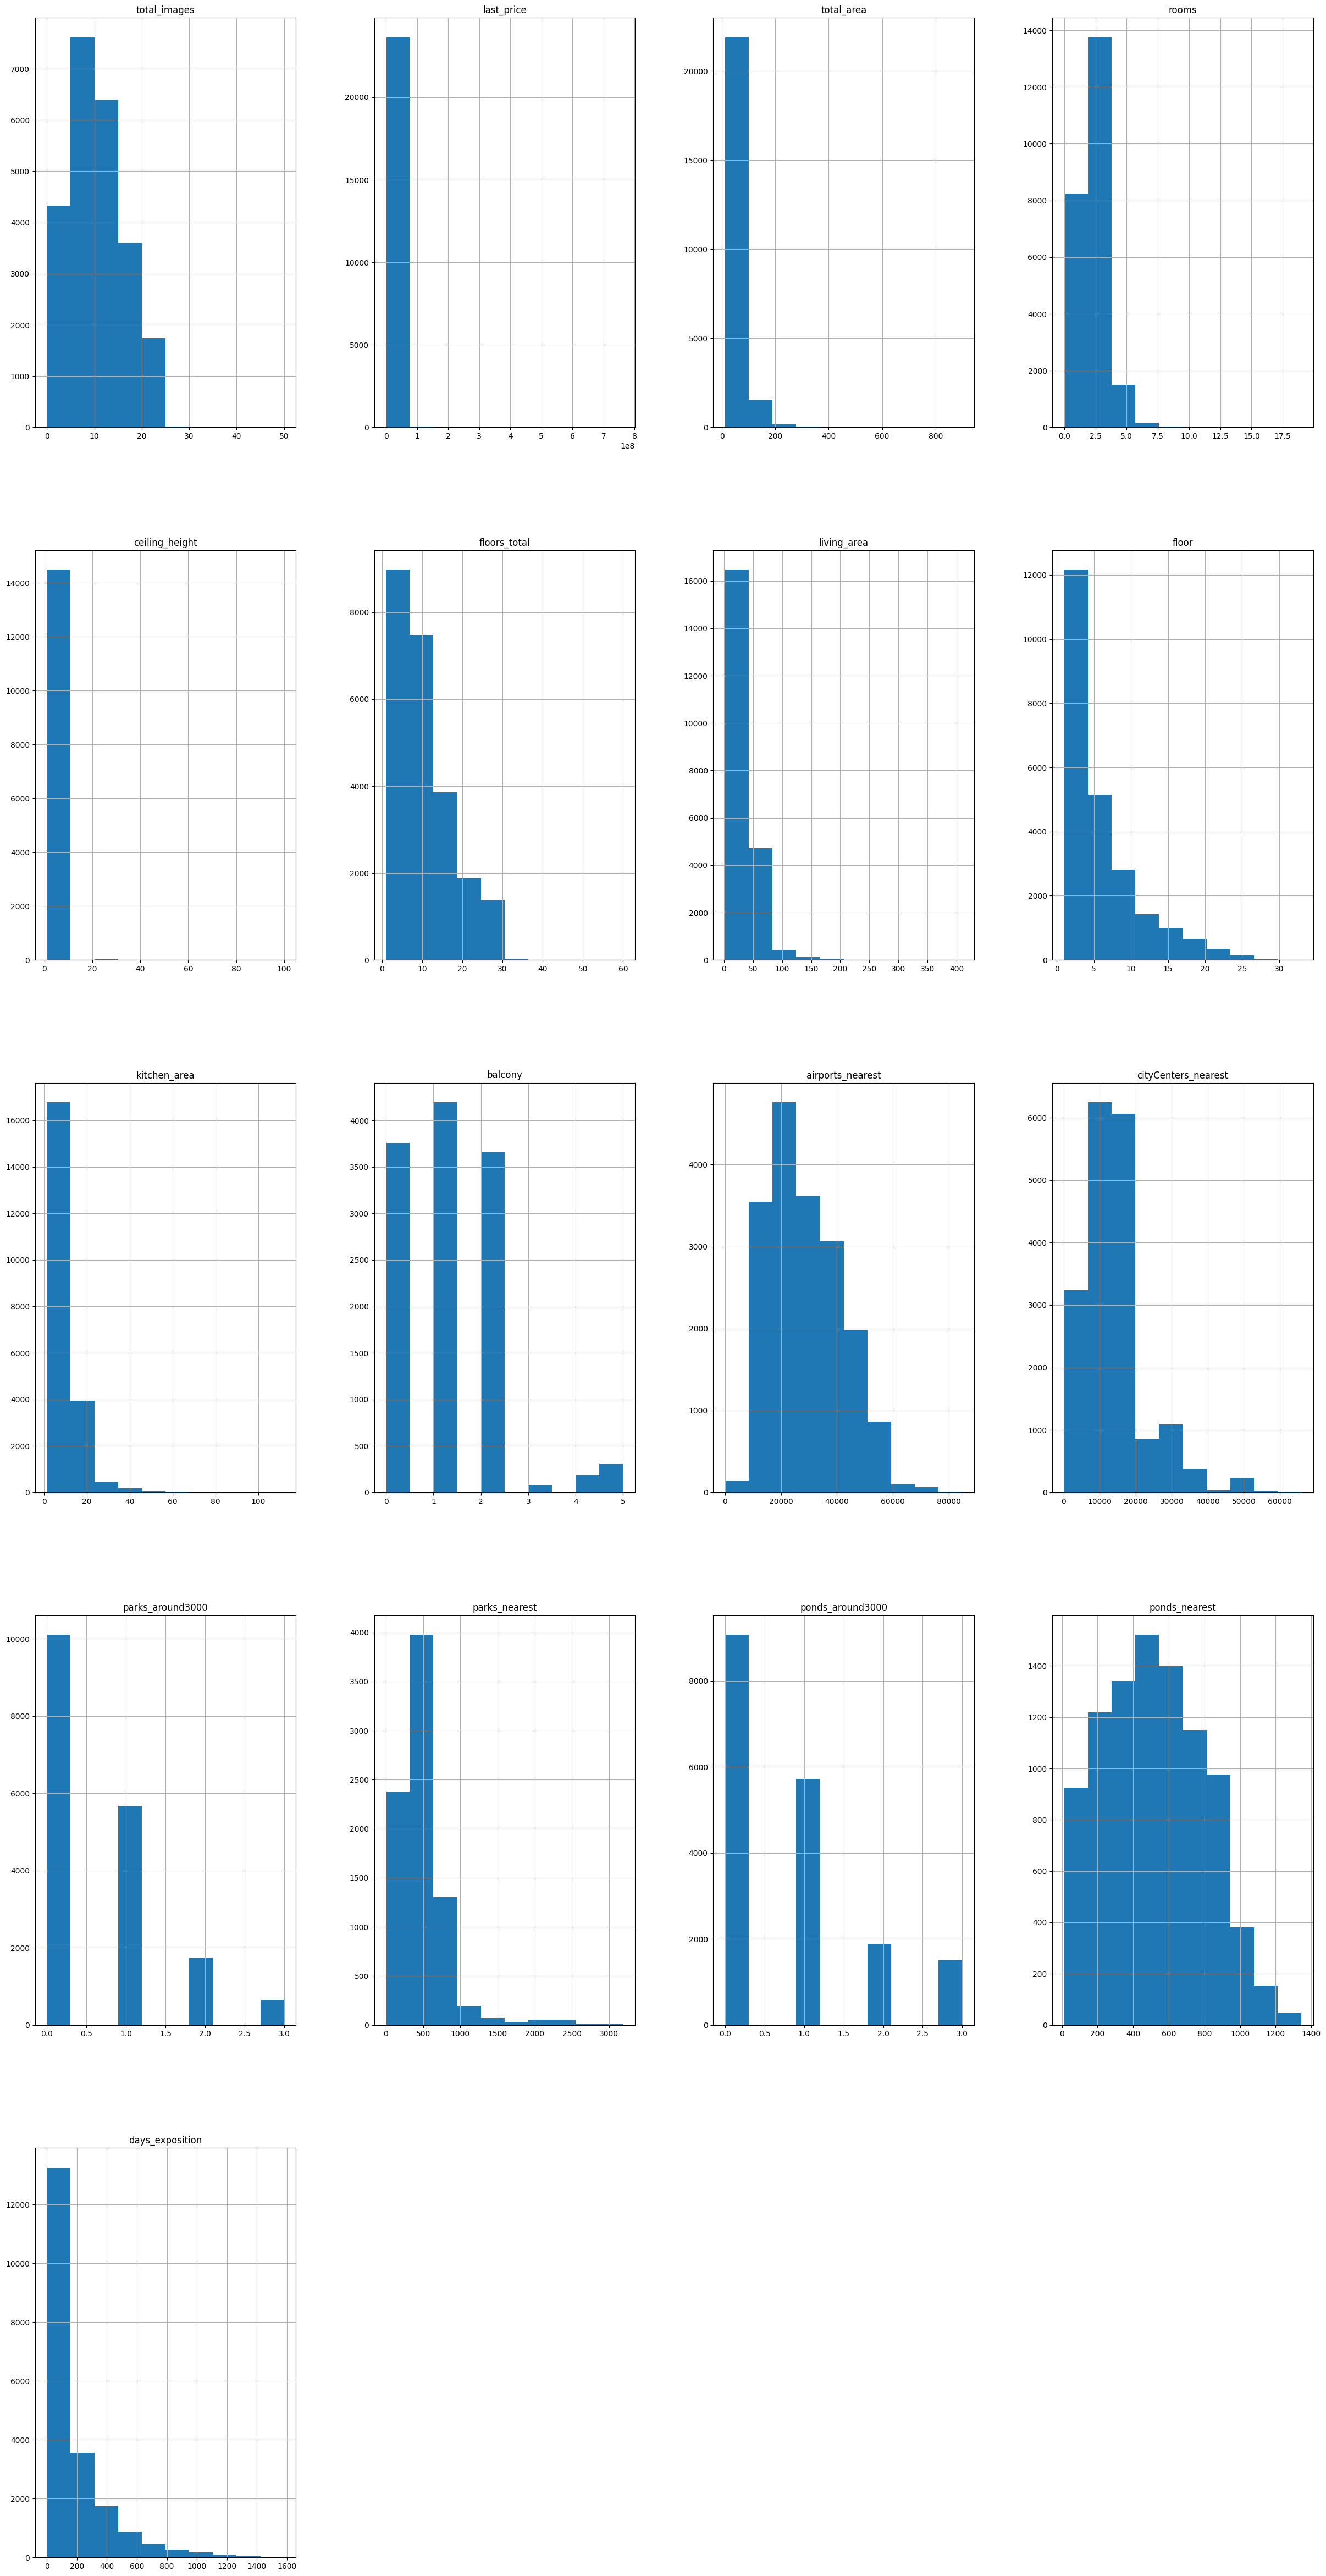

In [5]:
# Строим гистограммы
df.hist(figsize=(30,60))
plt.show()

#### Промежуточный вывод по пункту 1
Из всех представленных величин до предобработки данных нормальное распределение или распределение Пуассона имеют лишь гистограммы **total_area**, **floors_total**, **living_area**, **floor**, **kitchen_area**, **days_explosition**. Для остальных величин необходимо произвести предобработку данных с последующим анализом. Также наблюдается большое количество пропущенных значений в **balcony**, **parks_around3000**, **ponds_around3000**, для этих категорий необходимо выяснить, в чем причина пропусков и попробовать их заполнить.

### 2. Предобработка данных.

1. Найдите и изучите пропущенные значения в столбцах:
  * Определите, в каких столбцах есть пропуски.
  * Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
  * В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
2. Рассмотрите типы данных в каждом столбце:
  * Найдите столбцы, в которых нужно изменить тип данных.
  * Преобразуйте тип данных в выбранных столбцах.
  * В ячейке с типом markdown поясните, почему нужно изменить тип данных.
3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

***`Подсказка:`***  
Избавиться от явных дубликатов в этом случае можно разными способами. Один из самых простых: воспользоваться цепочкой методов replace().   

#### 1. Найдите и изучите пропущенные значения в столбцах:
  * Определите, в каких столбцах есть пропуски.
  * Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
  * В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [6]:
# Определяем, в каких столбцах есть пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

В единственной или последней строке ячейки кода Юпитера, метод print() не обязателен, в отличии от тренажера

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено </div>

**`Возможные причины пропусков параметров и что делать с пропусками в рамках данного кейса`**:
1. floors_total, 86 пропущенных значений - малая доля пропущенных значений, возможен человеческий фактор при заполнении, ***удалить строки с пропущенными значениями, так как они не имеют сильного влияния на результат анализа***;
2. living_area, 1903 пропущенных значения - возможен технический сбой или системная ошибка, т.к. большое количество пропущенных значений, ***оставить пропуски как есть***;
3. is_apartment, 20924 пропущенных значения - абсолютное количество ячеек не заполнено, среди заполненых же преобладает False (2725 против 50 True), ***оставить пропуски как есть, так как они не имеют сильного влияния на результат анализа***;
4. kitchen_area, 2278 пропущенных значений - отсутствие кухни как правило, если дело не касается однокомнатных лофтов, невозможно, поэтому имеет место человеческий фактор при заполнении или сбой, ***оставляем пропуски, чтобы не искажать средние показатели по параметру***;
5. balcony, 11519 пропущенных значений - речь идет только о наличии балкона, поэтому можно ***проставить 0 везде, где есть пропуски***, скорее всего это означает, что балкон отсутствует;
6. locality_name, 49 пропущенных значений - малая доля пропущенных значений, возможен человеческий фактор при заполнении, ***удалить строки с пропущенными значениями, так как они не имеют сильного влияния на результат анализа***;
7. airports_nearest, 5542 пропущенных значения - возможно отсутствие ближайшего аэропорта как такового, ноль указывать нельзя, так как речь идет не о наличии аэропорта, а о самом расстоянии и нулями можно испортить метрики, ***оставить пропуски как есть***;
8. cityCenters_nearest, 5519 пропущенных значений - возможно значения пропущены, так как квартиры расположены непосредственно в центре города, соответственно так как указано расстояние до центра, **можно заполнить пропуски нулями**; 
9. parks_around3000, 5518 пропущенных значений - так как речь идет о числе парков, можно ***вместо пропусков поставить 0***, так как пропуск скорее всего означает, что парков в радиусе 3км нет; 
10. parks_nearest, 15620 пропущенных значений ***оставляем пропуски, чтобы не искажать средние показатели по параметру***. Ввиду того, что речь идет о расстоянии до ближайшего парка, расстояние не может быть равно нулю в отличие от колонки с расстоянием до центра города, поэтому имеет место систематическая ошибка или сбой;
11. ponds_around3000, 5518 пропущенных значений - так как речь идет о числе водоемов, можно ***вместо пропусков поставить 0***, так как пропуск скорее всего означает, что водоемов в радиусе 3км нет; 
12. ponds_nearest, 14589 пропущенных значений ***оставляем пропуски, чтобы не искажать средние показатели по параметру***. Ввиду того, что речь идет о расстоянии до ближайшего водоема, расстояние не может быть равно нулю в отличие от колонки с расстоянием до центра города, поэтому имеет место систематическая ошибка или сбой;
13. days_exposition, 3181 пропущенное значение - возможно пропуски означают, что объявление все еще не снято на момент опубликования таблицы с данными. ***Оставляем пропуски, чтобы не искажать значения ***

In [7]:
# Заполняем пропущенные значения там, где это возможно
df = df.dropna(subset=['floors_total', 'locality_name'])

df['is_apartment'] = df['is_apartment'].fillna(value='')
print(df['is_apartment'].isna().sum())
print(df['is_apartment'].value_counts())
print()

df['balcony'] = df['balcony'].fillna(0)
print(df['balcony'].isna().sum())
print(df['balcony'].value_counts())
print()

df['locality_name'] = df['locality_name'].fillna(value='')
print(df['locality_name'].isna().sum())
print(df['locality_name'].value_counts())
print()

df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
print(df['cityCenters_nearest'].isna().sum())
print(df['cityCenters_nearest'].value_counts())
print()

df['airports_nearest'] = df['airports_nearest'].fillna(value='')
print(df['airports_nearest'].isna().sum())
print(df['airports_nearest'].value_counts())
print()

df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
print(df['ponds_around3000'].isna().sum())
print(df['ponds_around3000'].value_counts())
print()

df['parks_around3000'] = df['parks_around3000'].fillna(0)
print(df['parks_around3000'].isna().sum())
print(df['parks_around3000'].value_counts())

print(df.isna().sum())

0
         20805
False     2710
True        50
Name: is_apartment, dtype: int64

0
0.0    15155
1.0     4187
2.0     3656
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

0
Санкт-Петербург                   15651
посёлок Мурино                      520
посёлок Шушары                      439
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Рабитицы                      1
посёлок городского типа Рябово        1
деревня Мануйлово                     1
посёлок Форт Красная Горка            1
поселок Усть-Луга                     1
Name: locality_name, Length: 364, dtype: int64

0
0.0        5501
8460.0       61
20802.0      32
10720.0      30
20444.0      27
           ... 
33485.0       1
4329.0        1
14414.0       1
32476.0       1
4234.0        1
Name: cityCenters_nearest, Length: 7624, dtype: int64

0
           5524
37434.0      61
21928.0      32
44870.0      30
39946.0      30
     

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Замена пропущенных значений на медиану/среднее может исказить данные и внести некоторую проблему при дальнейшем анализе. Позволь мне рассказать подробнее о причинах и последствиях такого подхода.

1. Искажение распределения: Когда мы заменяем пропущенные значения на медиану, мы фактически добавляем новые значения в набор данных. Это может привести к смещению распределения и искажению статистических свойств данных. Замена на медиану может привести к тому, что данные будут выглядеть более однородными, чем они есть на самом деле.

2. Возможные последствия: Замена пропущенных значений на медиану может повлиять на многие аспекты анализа данных:

   - Статистические тесты: Искаженные данные могут привести к неправильным выводам в статистических тестах. Использование искаженных данных может привести к неверным результатам тестов на значимость и оценке эффектов между группами или условиями.

   - Моделирование: В случае использования искаженных данных для построения моделей, модели также могут страдать от искажения и давать неправильные предсказания или выводы. Это может быть особенно важно, если пропущенные значения связаны с ключевыми переменными модели.

   - Выводы и интерпретация: Искаженные данные могут привести к неверным выводам и неправильной интерпретации результатов. Например, если пропущенные значения связаны с важными факторами, замена на медиану может привести к неправильному пониманию влияния этих факторов на исследуемую переменную.

Итак, вместо замены пропущенных значений на медиану, рекомендуется применять другие подходы к обработке пропущенных данных, такие как:

- Удаление записей с пропущенными значениями: Если количество записей с пропущенными значениями невелико по сравнению с общим объемом данных, удаление этих записей может быть разумным подходом.

- Импутация данных: Использование более сложных методов, таких как импутация данных, может помочь восстановить пропущенные значения на основе других переменных в наборе данных. Например, можно использовать модели машинного обучения, чтобы предсказать пропущенные значения на основе имеющихся данных.

Важно оценивать причину появления пропущенных значений и выбирать подход к их обработке на основе специфики данных и целей исследования. Правильная обработка пропущенных значений помогает сохранить точность и надежность анализа данных.


<div class="alert alert-info"> <b>Комментарий студента:</b> Пропуски, которые занимали незначительный объем от общих данных, были удалены (floors_total и locality_name). Остальные пропуски оставлены в датафрейме, кроме тех, которые в рамках кейса советовали заполнить медианными и средними значениями, например `ceiling_height`. Так как неизвестна природа пропусков в данном кейсе и количество этих пропусков достаточно значительно (например parks_nearest и ponds_nearest - более 14000 пропущенных значений), в рамках кейса они были заменены на средние значения ввиду того, что методы машинного обучения пока неизвестны. Можно ли сделать что-то с ними на данном этапе обучения, ведь пропуски в 14000+ значениях тоже могут повлиять на результаты анализа?</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Представь ситуацию, когда размер кухни 20м2, а ты меняешь на среднее значение в 8м2. Согласись, замена на "случайное" число не совсем корректно. В этих случаях рекомендую оставить пропуски в их изначальном виде. Нам ведь не обязательно запонять все пропуски. 
    
Замена пропусков должна быть или рациональной, или оставить их, как писал ранее

<div class="alert alert-info"> <b>Комментарий студента №2:</b> Исправлены причины, по которым могли появиться пропуски в параметрах living_area, kitchen_area, parks_nearest, ponds_nearest, days_exposition, ceiling_height. Также в этих параметрах оставлены пропуски, так как изменение данных значений на среднее или медиану может сильно поменять на результат исследования.</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Здорово, что разобрались)

#### 2. Рассмотрите типы данных в каждом столбце:
  * Найдите столбцы, в которых нужно изменить тип данных.
  * Преобразуйте тип данных в выбранных столбцах.
  * В ячейке с типом markdown поясните, почему нужно изменить тип данных.

In [8]:
# Находим столбцы, в которых нужно изменить тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Не обязательно заполнять все пропуски. Замена пропусков должна быть или рациональной, или оставить их
</div>

<div class="alert alert-info"> <b>Комментарий студента №2:</b> Принято, исправлено выше.</div>

**`Столбцы, в которых необходимо сменить тип данных и обоснование, почему это необходимо сделать`**:
1. floors_total (float -> int), т.к. количество этажей не может быть нецелым числом;
2. is_apartment (object -> bool), т.к. в данном столбцы присутствуют только True, False и nan и столбец должен являться булевым;
3. balcony (float -> int), т.к. количество балконов не может быть нецелым числом;
4. parks_around3000 (float -> int) -||-;
5. ponds_around(3000) (float -> int) -||-;
6. days_exposition (float -> int) -||-;
7. cityCenters_nearest (object -> float), т.к. в столбце содержится расстояние до центра города;
8. kitchen_area (object -> float), т.к. квадратная площадь кухни;
9. parks_nearest (object -> float), т.к. расстояние до ближайшего парка;
10. ponds_nearest (object -> float), т.к. расстояние до ближайшего пруда.

In [9]:
# Преобразовываем тип данных в выбранных столбцах
df['floors_total'] = df['floors_total'].astype('int') 
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int') 
df['days_exposition'] = pd.to_numeric(df['days_exposition'].round(), errors='coerce')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'])
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'])
df['parks_nearest'] = pd.to_numeric(df['parks_nearest'], errors='coerce')
df['ponds_nearest'] = pd.to_numeric(df['ponds_nearest'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  int32  
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int32  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Столбцы имеют корректный тип данных

#### 3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [10]:
# Избавление от неявных дубликатов, смотрим столбец "locality_name", так как в нем содержатся названия населенных пунктов и есть возможность найти неявные дубликаты, если они есть:
print(df['locality_name'].nunique())
print()
print(df['locality_name'].unique())

364

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новы

**Выявленные неявные дубликаты:** 
1. Дублирование одних и тех же населенных пунктов, названных по-разному: `посёлок`, `поселок`, `посёлок городского типа`, `поселок городского типа`, `городской посёлок`

In [11]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок', 'посёлок городского типа', 'поселок городского типа', 'городской посёлок'], 'посёлок', regex=True)
) 

In [12]:
#Проверим, как изменилось количество уникальных наименований в столбце locality_name
print(df['locality_name'].nunique())
print()
print(df['locality_name'].unique())

#Создадим функцию, которая будет проверять количество наименований в столбце locality_name по ключевым словам, в том числе используем функцию для проверки того, исключились ли неявные дубликаты

def name_check(wrong_name):
    duplicate_names_count = 0
    for i in df['locality_name']:
        if wrong_name in i:
            duplicate_names_count += 1
    return duplicate_names_count

print()
print()
#Проверка неявных дубликатов
print('Количество наименований, которые включают слово "поселок" равняется', name_check('поселок'))
print('Количество наименований, которые включают фразу "посёлок городского типа" равняется', name_check('посёлок городского типа'))
print('Количество наименований, которые включают фразу "поселок городского типа" равняется', name_check('поселок городского типа'))
print('Количество наименований, которые включают фразу "городской посёлок" равняется', name_check('городской посёлок'))
#Подсчет количества определенных наименований
print()
print('Количество наименований, которые включают фразу "посёлок" равняется', name_check('посёлок'))
print('Количество наименований, которые включают фразу "деревня" равняется', name_check('деревня'))
print(df['locality_name'].nunique())

336

['Санкт-Петербург' 'посёлок Шушары' 'посёлок Янино-1' 'посёлок Парголово'
 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино'
 'посёлок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'посёлок Металлострой' 'посёлок Лебяжье' 'посёлок Сиверский'
 'посёлок Молодцово' 'посёлок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'посёлок Романовка' 'посёл

In [13]:
# Избавление от явных дубликатов
df['balcony'] = (
    df['balcony']
    .replace([0], 0.0, regex=True)
) 

print(f'Количество явных дубликатов: {df.duplicated().sum()}')
print()

Количество явных дубликатов: 0



#### Вывод по пункту 3:
При изучении датафрейма на предмет наличия неявных дубликатов, были проведены операции со столбцом 'locality_name', так как он содержал повторяющиеся названия одних и тех же населенных пунктов: `посёлок`, `поселок`, `посёлок городского типа`, `поселок городского типа`, `городской посёлок`. По итогу все эти названия были приведены к наименованию `посёлок`. При исследовании на наличие явных дубликатов были проведены операции со столбцом `balcony`, вследствие чего все значения с дробной частью `0.0` были заменены на `0`. 

### 3. Посчитайте и добавьте в таблицу новые столбцы.

* Добавьте в таблицу новые столбцы со следующими параметрами:
  * цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
  * день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
  * месяц публикации объявления;
  * год публикации объявления;
  * тип этажа квартиры (значения — «‎первый», «последний», «другой»);
  * расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [14]:
#Добавим столбец с ценой одного квадратного метра
df['square_cost'] = (df['last_price'] / df['total_area']).round(2)
print(df['last_price'].head())
print(df['square_cost'].head())

0    13000000.0
1     3350000.0
2     5196000.0
3    64900000.0
4    10000000.0
Name: last_price, dtype: float64
0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: square_cost, dtype: float64


In [15]:
#Добавим столбец с днем публикации объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['sales_day'] = df['first_day_exposition'].dt.weekday
print(df['sales_day'].head())
print(df['first_day_exposition'].head())

0    3
1    1
2    3
3    4
4    1
Name: sales_day, dtype: int64
0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [16]:
#Добавим столбец с месяцем публикации объявления
df['sales_month'] = df['first_day_exposition'].dt.month
df['sales_month'].head()

0     3
1    12
2     8
3     7
4     6
Name: sales_month, dtype: int64

In [17]:
#Добавим столбец с годом публикации объявления
df['sales_year'] = df['first_day_exposition'].dt.year
df['sales_year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: sales_year, dtype: int64

In [18]:
#Добавим столбец с типом этажа квартиры (первый, последний, другой) и посчитаем их количество по типам
def floors_type(i):
        if i['floor'] == 1:
            return 'Первый этаж'
        elif i['floor'] == i['floors_total']:
            return 'Последний этаж'
        else:
            return 'Другой этаж'
               
df['floor_type'] = df.apply(floors_type, axis = 1)

print(df['floor'].head())
print(df['floors_total'].head())
print(df['floor_type'].head())
print(df['floor_type'].value_counts())

0     8
1     1
2     4
3     9
4    13
Name: floor, dtype: int64
0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32
0    Другой этаж
1    Первый этаж
2    Другой этаж
3    Другой этаж
4    Другой этаж
Name: floor_type, dtype: object
Другой этаж       17326
Последний этаж     3330
Первый этаж        2909
Name: floor_type, dtype: int64


In [19]:
#Добавим столбец с расстоянием до центра города в километрах
df['cityCenter_km'] = (df['cityCenters_nearest'] / 1000).round()
print(df['cityCenters_nearest'].head())
print(df['cityCenter_km'].head())

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64
0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenter_km, dtype: float64


### 4. Проведите исследовательский анализ данных.

1. Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.<br/>
  **Список параметров:**
  * общая площадь;
  * жилая площадь;
  * площадь кухни;
  * цена объекта;
  * количество комнат;
  * высота потолков;
  * тип этажа квартиры («первый», «последний», «другой»);
  * общее количество этажей в доме;
  * расстояние до центра города в метрах;
  * расстояние до ближайшего парка.
* Опишите все ваши наблюдения по параметрам в ячейке с типом `markdown`.
2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
  * Постройте гистограмму.
  * Посчитайте среднее и медиану.
  * В ячейке типа `markdown` опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
* Изучите, зависит ли цена от:
  * общей площади;
  * жилой площади;
  * площади кухни;
  * количества комнат;
  * этажа, на котором расположена квартира (первый, последний, другой);
  * даты размещения (день недели, месяц, год).
* Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

#### 1. Изучение параметров

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

19540    900.00
12859    631.20
3117     631.00
15651    618.00
5358     590.00
4237     517.00
8018     507.00
15016    500.00
5893     500.00
12401    495.00
9826     494.10
22494    491.00
6621     488.00
660      483.90
6221     470.30
20273    460.80
3676     441.98
21955    431.00
22131    422.20
14991    413.50
Name: total_area, dtype: float64



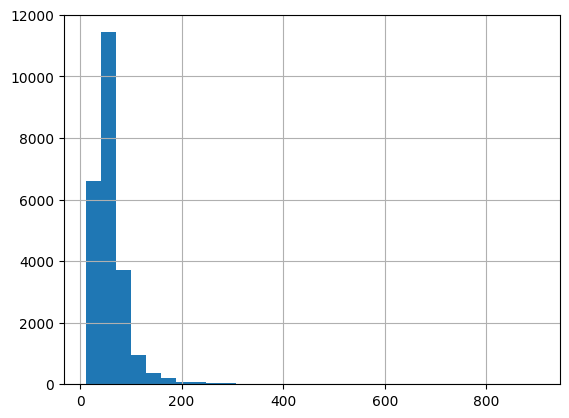

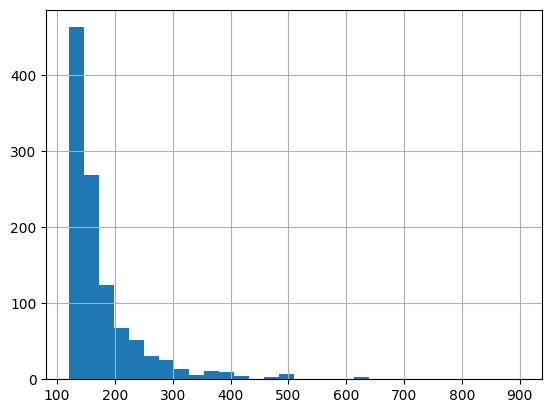

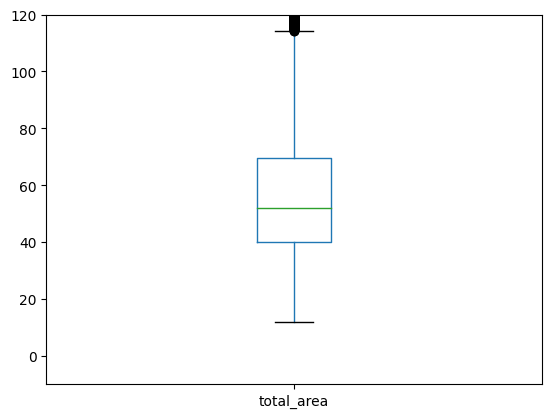

In [21]:
# Изучения параметра "общая площадь" - total_area:
print(df['total_area'].sort_values(ascending=False).head(20))
print()

df['total_area'].hist(bins=30)
plt.show()
df['total_area'].hist(range=(120, 900), bins=30)
plt.show()
df['total_area'].plot.box()
plt.ylim(-10, 120)
plt.show()

In [22]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [23]:
# Рассчитаем граничное значение, равное Q3+1.5iqr, после которого начинаются выбросы:
total_area_iqr = stats.iqr(df['total_area'])
total_area_upper = 69.9 + 1.5*total_area_iqr
total_area_lower = 40 - 1.5*total_area_iqr
print(f'Межквартильный размах: {total_area_iqr}')
print(f'Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: {total_area_upper}')
print(f'Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: {total_area_lower}, так как данное значение меньше минимального, нижнюю границу принимаем min = 12')

Межквартильный размах: 29.700000000000003
Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: 114.45000000000002
Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: -4.550000000000004, так как данное значение меньше минимального, нижнюю границу принимаем min = 12


In [24]:
df.query('total_area > @total_area_upper').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
19540,8,420000000.0,900.00,2017-12-06,12,2.80,25,409.7,25,False,...,NaN,2,318.0,106.0,466666.67,2,12,2017,Последний этаж,8.0
12859,20,140000000.0,631.20,2019-04-09,7,3.90,4,322.3,4,False,...,NaN,2,210.0,NaN,221799.75,1,4,2019,Последний этаж,5.0
3117,19,140000000.0,631.00,2019-03-30,7,NaN,5,NaN,5,False,...,NaN,2,210.0,NaN,221870.05,5,3,2019,Последний этаж,5.0
15651,20,300000000.0,618.00,2017-12-18,7,3.40,7,258.0,5,False,...,NaN,2,198.0,111.0,485436.89,0,12,2017,Другой этаж,5.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.0,3,False,...,767.0,0,NaN,14.0,110169.49,3,2,2019,Другой этаж,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,13,10200000.0,114.80,2018-07-19,3,3.25,5,72.0,5,False,...,740.0,3,365.0,264.0,88850.17,3,7,2018,Последний этаж,1.0
20809,12,12990000.0,114.60,2017-06-29,4,2.78,9,74.1,8,False,...,2137.0,1,933.0,326.0,113350.79,3,6,2017,Другой этаж,5.0
12831,13,12354000.0,114.60,2016-01-18,4,NaN,10,74.0,5,False,...,NaN,1,756.0,357.0,107801.05,0,1,2016,Другой этаж,5.0
18273,13,28114000.0,114.55,2017-07-26,4,3.00,7,NaN,4,False,...,572.0,0,NaN,482.0,245429.94,2,7,2017,Другой этаж,7.0


In [25]:
#удаление аномальных значений из датафрейма:
df = df.query('total_area <= @total_area_upper')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22329 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22329 non-null  int64         
 1   last_price            22329 non-null  float64       
 2   total_area            22329 non-null  float64       
 3   first_day_exposition  22329 non-null  datetime64[ns]
 4   rooms                 22329 non-null  int64         
 5   ceiling_height        13629 non-null  float64       
 6   floors_total          22329 non-null  int32         
 7   living_area           20590 non-null  float64       
 8   floor                 22329 non-null  int64         
 9   is_apartment          22329 non-null  bool          
 10  studio                22329 non-null  bool          
 11  open_plan             22329 non-null  bool          
 12  kitchen_area          20217 non-null  float64       
 13  balcony         

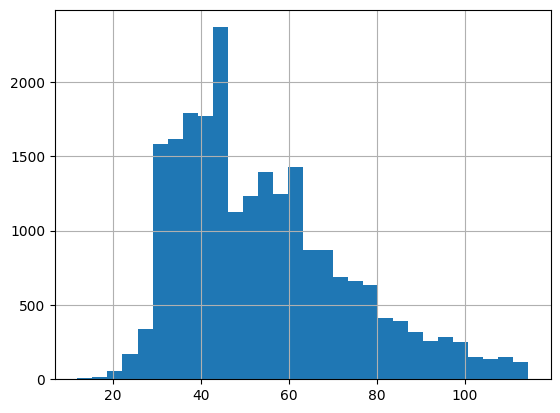

In [26]:
#гистограмма по обновленнымм данным:
df['total_area'].hist(bins=30)
plt.show()

**Вывод по параметру `общая площадь`:** по построенным гистограммам (общая, в заданном диапазоне) и масштабированной диаграмме размаха, видно, что выбросы начинаются с отметки `114.45` квадратных метров. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было. Например, при максимальном значении в 900 квадратных метров, в квартире указано при этом 12 комнат и стоимость 480 миллионов с локацией в Санкт-Петербурге, что в теории может совпадать с реальностью. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Соответственно, было произведено удаление `1236` значений по данному параметру из датафрейма. 

20256    101.000000
7243      93.600000
19589     93.000000
23216     90.200000
16346     90.000000
6059      89.100006
424       88.000000
7332      87.000000
3467      87.000000
22779     87.000000
13686     86.200000
17837     85.000000
9887      85.000000
2017      84.500000
15855     84.500000
16117     84.500000
22667     84.500000
17205     84.000000
7038      84.000000
19473     83.000000
Name: living_area, dtype: float64



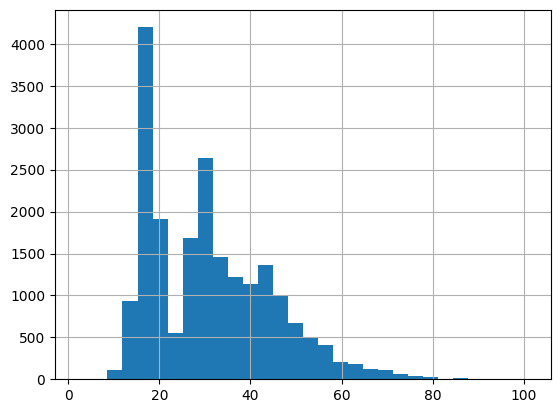

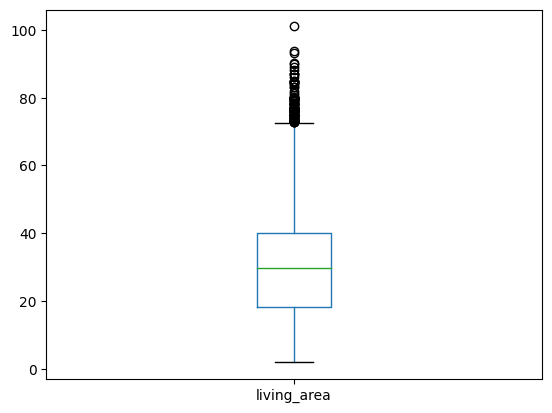

In [27]:
# Изучения параметра "жилая площадь" - living_area:
print(df['living_area'].sort_values(ascending=False).head(20))
print()

df['living_area'].hist(bins=30)
plt.show()
df['living_area'].plot.box()
plt.show()

In [28]:
df['living_area'].describe()

count    20590.000000
mean        31.064258
std         13.487489
min          2.000000
25%         18.300000
50%         29.775000
75%         40.000000
max        101.000000
Name: living_area, dtype: float64

In [29]:
df.query('living_area > 73').sort_values(by='living_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
20256,5,13351000.0,102.7,2018-07-03,6,3.40,4,101.0,1,False,...,519.0,0,NaN,229.0,130000.00,1,7,2018,Первый этаж,5.0
7243,5,6500000.0,114.0,2017-12-07,3,2.65,5,93.6,5,False,...,671.0,1,969.0,NaN,57017.54,3,12,2017,Последний этаж,16.0
19589,19,20350000.0,113.0,2017-12-12,3,NaN,4,93.0,1,False,...,170.0,1,401.0,56.0,180088.50,1,12,2017,Первый этаж,12.0
23216,15,10150000.0,114.0,2015-01-21,4,NaN,5,90.2,4,False,...,NaN,2,838.0,1052.0,89035.09,2,1,2015,Другой этаж,5.0
16346,7,13000000.0,108.4,2015-06-16,3,2.85,25,90.0,15,False,...,NaN,0,NaN,865.0,119926.20,1,6,2015,Другой этаж,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19043,15,12000000.0,113.3,2017-07-19,3,3.10,6,73.5,5,False,...,519.0,0,NaN,30.0,105913.50,2,7,2017,Другой этаж,4.0
3419,17,16650000.0,104.1,2018-11-16,4,2.95,5,73.4,2,False,...,552.0,2,726.0,154.0,159942.36,4,11,2018,Другой этаж,8.0
19868,19,12400000.0,106.0,2018-08-07,3,3.00,6,73.4,5,False,...,679.0,0,NaN,39.0,116981.13,1,8,2018,Другой этаж,4.0
213,11,8700000.0,111.4,2016-10-10,4,3.10,4,73.2,2,False,...,463.0,3,55.0,791.0,78096.95,0,10,2016,Другой этаж,1.0


In [30]:
#удаление аномальных значений из датафрейма:
df = df.query('living_area <= 73')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20485 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20485 non-null  int64         
 1   last_price            20485 non-null  float64       
 2   total_area            20485 non-null  float64       
 3   first_day_exposition  20485 non-null  datetime64[ns]
 4   rooms                 20485 non-null  int64         
 5   ceiling_height        12825 non-null  float64       
 6   floors_total          20485 non-null  int32         
 7   living_area           20485 non-null  float64       
 8   floor                 20485 non-null  int64         
 9   is_apartment          20485 non-null  bool          
 10  studio                20485 non-null  bool          
 11  open_plan             20485 non-null  bool          
 12  kitchen_area          19724 non-null  float64       
 13  balcony         

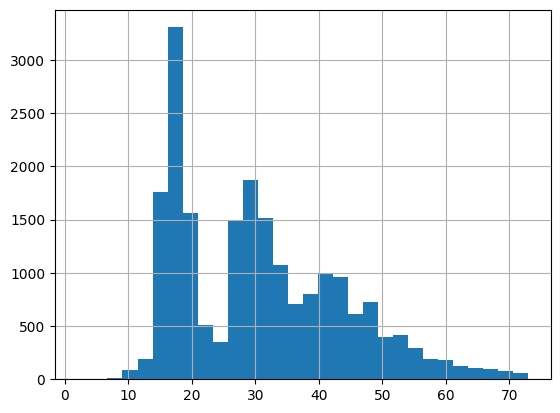

In [31]:
#гистограмма по обновленнымм данным:
df['living_area'].hist(bins=30)
plt.show()

**Вывод по параметру `жилая площадь`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `73` квадратных метров. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Соответственно, было произведено удаление `105` значений по данному параметру из датафрейма. 

16964    55.7
8709     51.0
511      50.0
5135     50.0
21331    49.4
20284    48.3
11686    47.0
6682     46.8
17077    45.0
20930    45.0
11634    45.0
5861     44.9
14143    43.8
6944     43.4
8158     42.8
8761     42.7
21081    41.1
2309     41.0
1804     41.0
4        41.0
Name: kitchen_area, dtype: float64



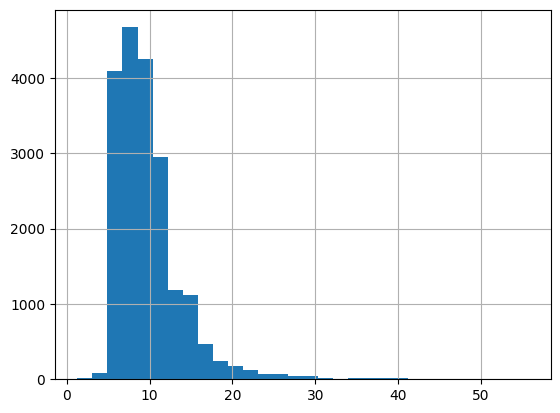

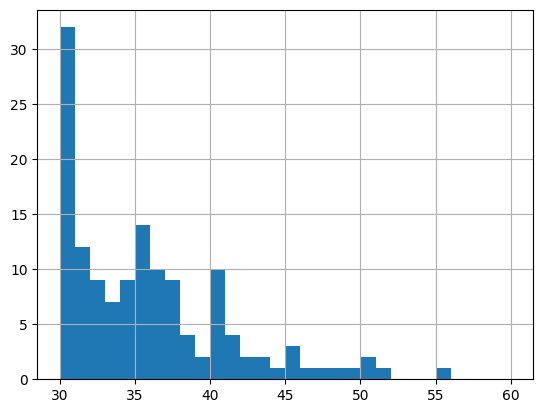

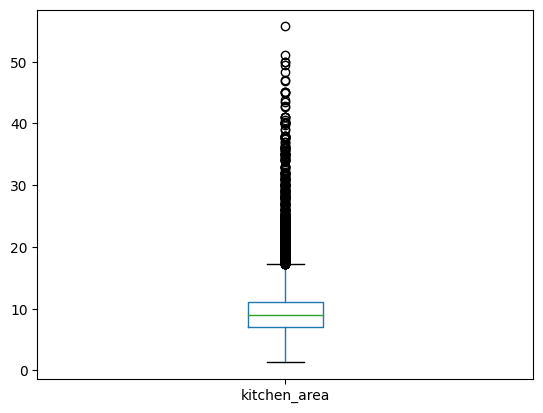

(-2.0, 20.0)

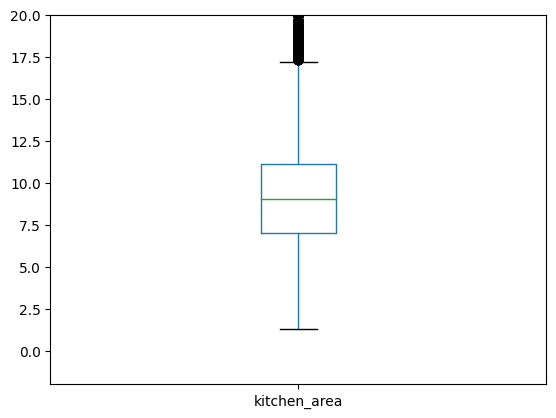

In [32]:
# Изучения параметра "площадь кухни" - kitchen_area:
print(df['kitchen_area'].sort_values(ascending=False).head(20))
print()

df['kitchen_area'].hist(bins=30)
plt.show()
df['kitchen_area'].hist(range=(30, 60), bins=30)
plt.show()
df['kitchen_area'].plot.box()
plt.show()
df['kitchen_area'].plot.box()
plt.ylim(-2, 20)

In [33]:
df['kitchen_area'].describe()

count    19724.000000
mean         9.842583
std          4.274767
min          1.300000
25%          7.000000
50%          9.000000
75%         11.102500
max         55.700000
Name: kitchen_area, dtype: float64

In [34]:
#удаление аномальных значений из датафрейма:
df = df.query('kitchen_area <= 17')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18780 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18780 non-null  int64         
 1   last_price            18780 non-null  float64       
 2   total_area            18780 non-null  float64       
 3   first_day_exposition  18780 non-null  datetime64[ns]
 4   rooms                 18780 non-null  int64         
 5   ceiling_height        11880 non-null  float64       
 6   floors_total          18780 non-null  int32         
 7   living_area           18780 non-null  float64       
 8   floor                 18780 non-null  int64         
 9   is_apartment          18780 non-null  bool          
 10  studio                18780 non-null  bool          
 11  open_plan             18780 non-null  bool          
 12  kitchen_area          18780 non-null  float64       
 13  balcony         

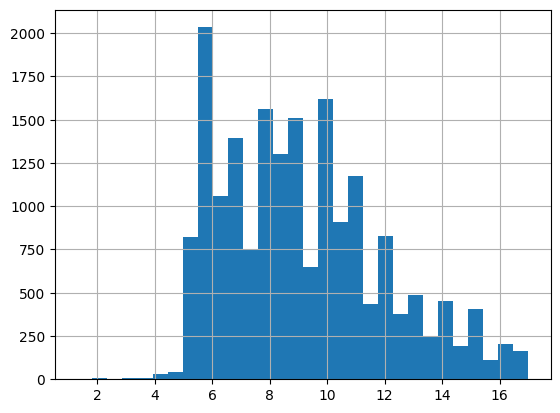

In [35]:
#гистограмма по обновленнымм данным:
df['kitchen_area'].hist(bins=30)
plt.show()

**Вывод по параметру `площадь кухни`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `17` квадратных метров. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Соответственно, было произведено удаление значений по данному параметру из датафрейма. 

10011    53000000.0
7136     48000000.0
6127     40000000.0
12916    39990000.0
8322     39900000.0
3527     37272000.0
16887    36000000.0
16562    35107000.0
16732    35000000.0
6825     35000000.0
15738    34551000.0
9183     33990000.0
10377    33000000.0
20563    31500000.0
3250     30500000.0
10654    29900000.0
20775    29800000.0
12240    28000000.0
22008    28000000.0
17678    27600000.0
Name: last_price, dtype: float64



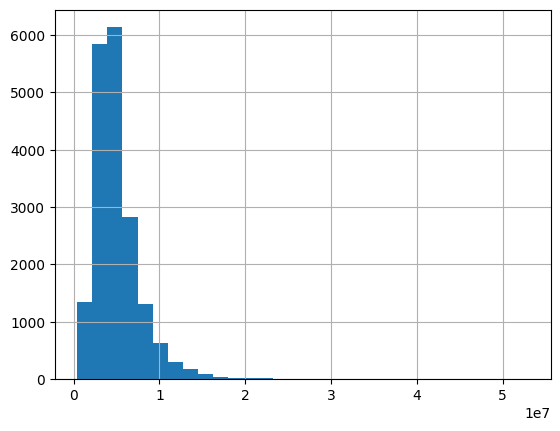

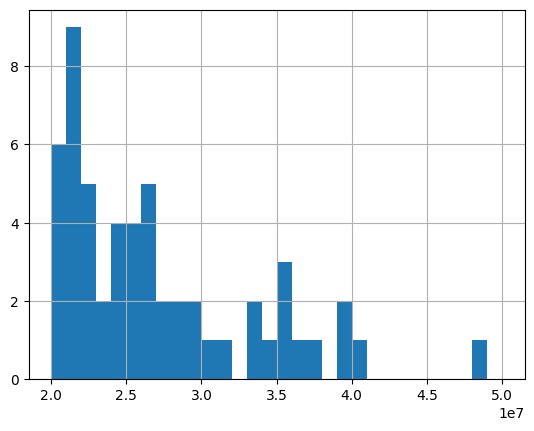

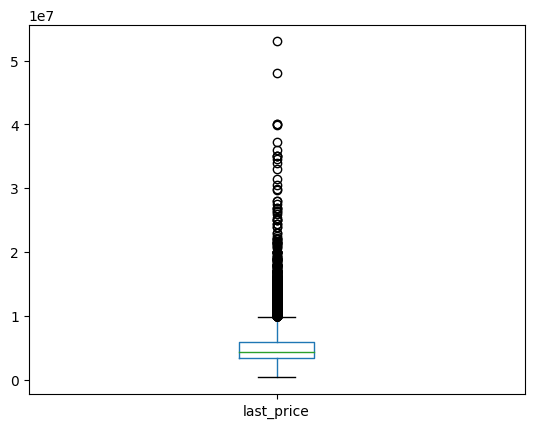

(0.0, 11000000.0)

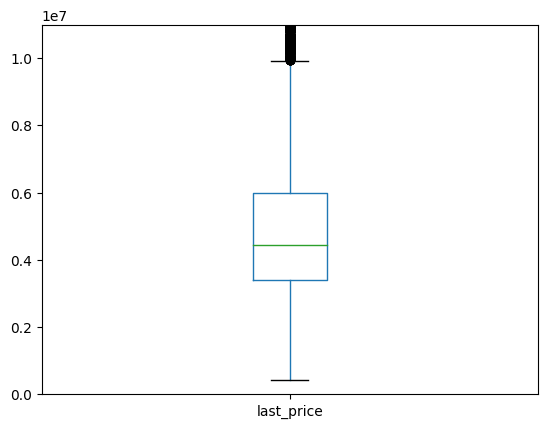

In [36]:
# Изучения параметра "цена объекта" - last_price:
print(df['last_price'].sort_values(ascending=False).head(20))
print()

df['last_price'].hist(bins=30)
plt.show()
df['last_price'].hist(range=(20000000, 50000000), bins=30)
plt.show()
df['last_price'].plot.box()
plt.show()
df['last_price'].plot.box()
plt.ylim(0, 11000000)

In [37]:
df['last_price'].describe()

count    1.878000e+04
mean     5.048053e+06
std      2.831738e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.450000e+06
75%      6.000000e+06
max      5.300000e+07
Name: last_price, dtype: float64

In [38]:
# Рассчитаем граничное значение, равное Q3+1.5iqr, после которого начинаются выбросы:
last_price_iqr = stats.iqr(df['last_price'])
last_price_upper = 5970747 + 1.5*last_price_iqr
last_price_lower = 4300000 - 1.5*last_price_iqr
print(f'Межквартильный размах: {last_price_iqr}')
print(f'Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: {last_price_upper}')
print(f'Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: {last_price_lower}, так как данное значение меньше минимального, нижнюю границу принимаем min = 430000')

Межквартильный размах: 2610000.0
Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: 9885747.0
Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: 385000.0, так как данное значение меньше минимального, нижнюю границу принимаем min = 430000


In [39]:
df.query('last_price > @last_price_upper').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
10011,3,53000000.0,90.0,2019-03-21,3,3.15,5,73.00,3,False,...,389.0,3,564.0,40.0,588888.89,3,3,2019,Другой этаж,2.0
7136,0,48000000.0,108.0,2018-02-01,3,NaN,5,61.00,2,False,...,551.0,3,415.0,144.0,444444.44,3,2,2018,Другой этаж,3.0
6127,13,40000000.0,65.3,2017-07-13,2,4.10,5,45.00,2,False,...,473.0,1,283.0,497.0,612557.43,3,7,2017,Другой этаж,2.0
12916,6,39990000.0,67.7,2015-06-25,3,3.10,7,42.90,6,False,...,72.0,3,202.0,NaN,590694.24,3,6,2015,Другой этаж,2.0
8322,20,39900000.0,55.3,2017-10-26,1,3.05,6,35.00,4,False,...,72.0,3,202.0,NaN,721518.99,3,10,2017,Другой этаж,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20368,8,9897258.0,85.2,2018-07-23,3,3.00,4,48.48,3,True,...,NaN,0,NaN,NaN,116165.00,0,7,2018,Другой этаж,21.0
7298,4,9890000.0,50.0,2016-04-28,1,3.00,10,22.04,7,False,...,NaN,1,982.0,NaN,197800.00,3,4,2016,Другой этаж,6.0
23545,10,9890000.0,87.0,2017-01-23,3,NaN,20,51.00,3,False,...,139.0,0,NaN,164.0,113678.16,0,1,2017,Другой этаж,9.0
3027,19,9890000.0,77.1,2017-12-12,2,2.75,16,41.40,6,False,...,NaN,0,NaN,130.0,128274.97,1,12,2017,Другой этаж,15.0


In [40]:
#удаление аномальных значений из датафрейма:
df = df.query('last_price <= @last_price_upper')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17756 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17756 non-null  int64         
 1   last_price            17756 non-null  float64       
 2   total_area            17756 non-null  float64       
 3   first_day_exposition  17756 non-null  datetime64[ns]
 4   rooms                 17756 non-null  int64         
 5   ceiling_height        11155 non-null  float64       
 6   floors_total          17756 non-null  int32         
 7   living_area           17756 non-null  float64       
 8   floor                 17756 non-null  int64         
 9   is_apartment          17756 non-null  bool          
 10  studio                17756 non-null  bool          
 11  open_plan             17756 non-null  bool          
 12  kitchen_area          17756 non-null  float64       
 13  balcony         

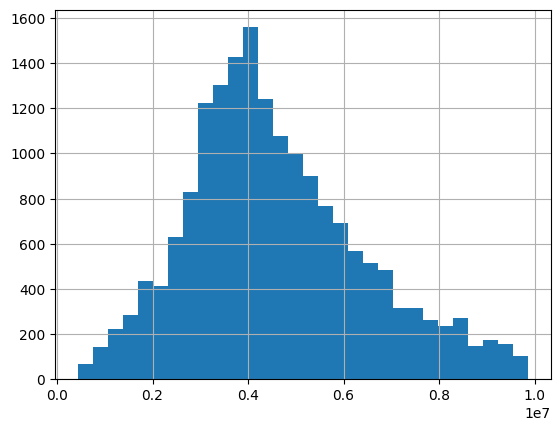

In [41]:
#гистограмма по обновленнымм данным:
df['last_price'].hist(bins=30)
plt.show()

**Вывод по параметру `цена объекта`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `9885747` рублей. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Соответственно, было произведено удаление `1024` значений по данному параметру из датафрейма. 

5255     6
23458    5
21919    5
14771    5
542      5
14985    5
13289    5
5206     5
6134     5
13381    5
4257     5
23427    5
7515     5
10602    5
20398    5
15010    5
2737     5
14508    5
1212     5
6994     5
Name: rooms, dtype: int64



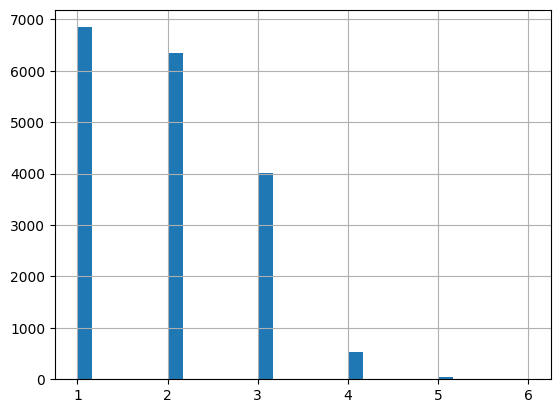

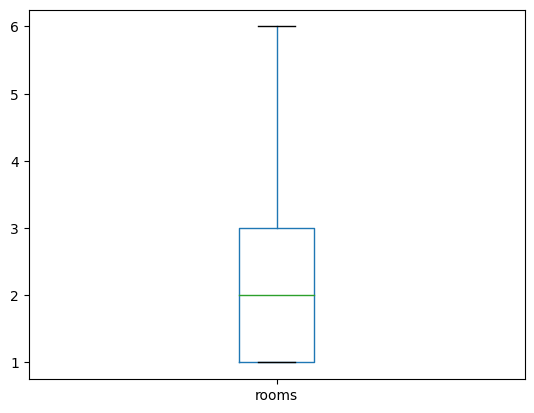

In [42]:
# Изучения параметра "количество комнат" - rooms:
print(df['rooms'].sort_values(ascending=False).head(20))
print()

# Так как обнаружилось 195 нулевых значений в данном параметре, а число комнат не может быть равным нулю, 
# заменим все нули на единицы, т.к. скорее всего имелось в виду, что продается отдельное помещение:
df['rooms'] = (
    df['rooms']
    .replace([0], 1, regex=True)
) 

df['rooms'].hist(bins=30)
plt.show()
df['rooms'].plot.box()
plt.show()

In [43]:
df['rooms'].describe()

count    17756.000000
mean         1.905215
std          0.859341
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

**Вывод по параметру `количество комнат`:** по построенной гистограмме и диаграмме размаха, видно, что выбросов нет.

3148     32.00
21377    27.50
22938    27.00
21824    27.00
5807     27.00
10773    27.00
5246     27.00
20478    27.00
5669     26.00
6246     25.00
4643     25.00
11285    25.00
14382    25.00
9379     25.00
5076     24.00
20507    22.60
17496    20.00
15061    14.00
5863      8.30
15743     8.00
3474      8.00
2823      4.50
4201      4.37
10754     4.30
22055     4.20
6617      4.20
2999      4.19
2639      4.19
154       4.15
1129      4.06
Name: ceiling_height, dtype: float64



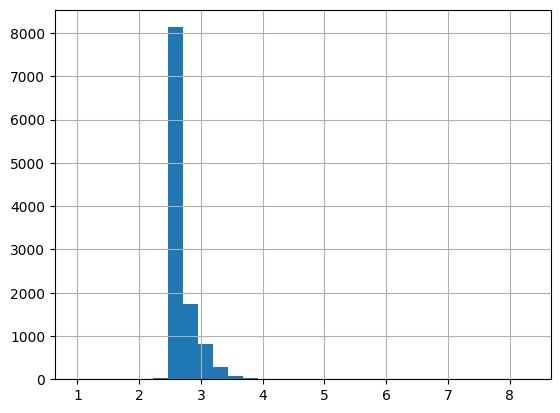

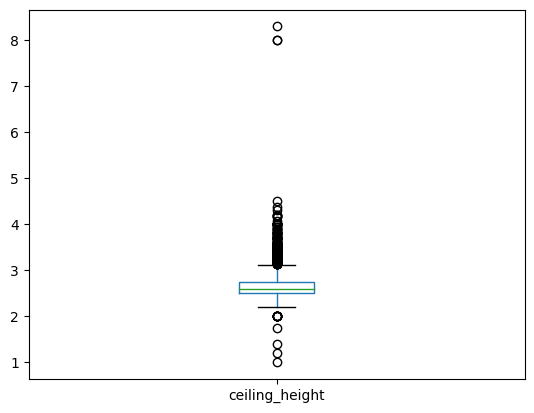

(0.0, 3.5)

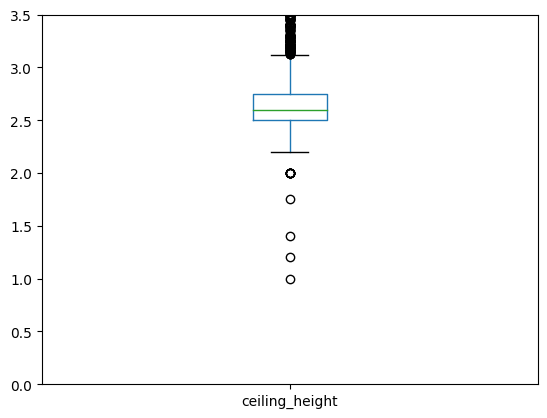

In [44]:
# Изучения параметра "высота потолков" - ceiling_height:
print(df['ceiling_height'].sort_values(ascending=False).head(30))
print()

# Так как обнаружилось 22 двузначных значения в данном параметре, разделим их на 10, так как с высокой степенью вероятности это просто ошибка при вводе:
# (Как сделать это через query или условие?)
df['ceiling_height'] = (
    df['ceiling_height']
    .replace([32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6, 20.0, 14.0, 10.3], [32.0/10, 27.5/10, 27.0/10, 26.0/10, 25.0/10, 24.0/10, 22.6/10, 20.0/10, 14.0/10, 10.3/10], regex=True)
) 

df['ceiling_height'].hist(bins=30)
plt.show()
df['ceiling_height'].plot.box()
plt.show()
df['ceiling_height'].plot.box()
plt.ylim(0, 3.5)

In [45]:
df['ceiling_height'].describe()

count    11155.000000
mean         2.667948
std          0.229924
min          1.000000
25%          2.500000
50%          2.600000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

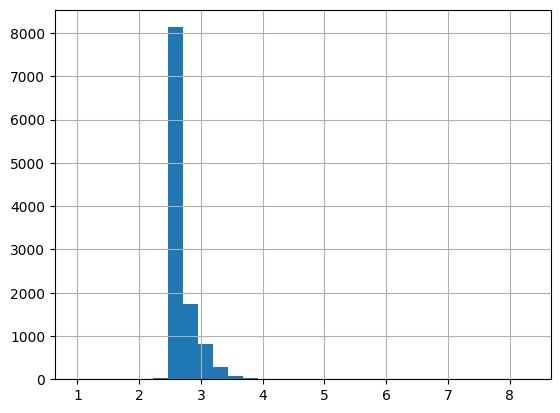

In [46]:
#гистограмма по обновленнымм данным:
df['ceiling_height'].hist(bins=30)
plt.show()

**Вывод по параметру `высота потолков`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `3.2` м и до отметки `2.3`. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было, кроме аномальнно высоких значений (`22` значения), в которых явно была допущена ошибка в порядке. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Тем не менее, в датафрейме по данному параметру слишком много пропущенных значений, удаление строк с которыми приведет к утере важных данных, поэтому было принято решение оставить строки с выбросами. 

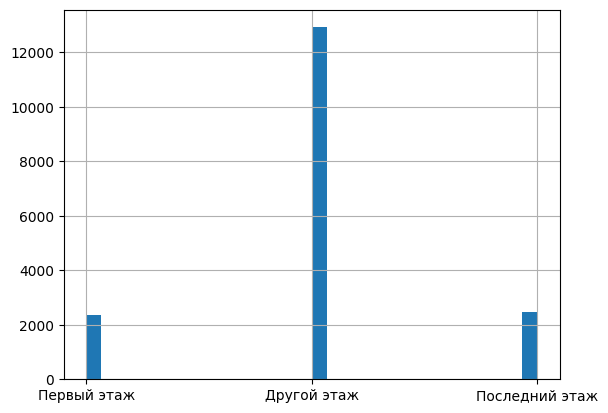

In [47]:
# Изучения параметра "тип этажа квартиры" - floor_type:
df['floor_type'].hist(bins=30)
plt.show()

In [48]:
df['floor_type'].value_counts()

Другой этаж       12920
Последний этаж     2484
Первый этаж        2352
Name: floor_type, dtype: int64

**Вывод по параметру `тип этажа квартиры`:** аномалий не выявлено, значения в колонке остаются без изменений. Если бы квартиры во всех домах всегда продавались от первого до последнего этажей, параметр "Первый этаж" должен был быть равен параметру "Последний этаж", но в условиях кейса данная информация отсутствует, поэтому предполагается, что не во всех домах продавались квартиры и на первом этаже, и на последнем, поэтому неравенство этих параметров в данном случае аномалией считать нельзя.

2253     60
16731    52
16934    37
11079    36
5807     36
22946    35
15982    35
7236     35
2966     35
5808     35
13975    35
871      35
9186     35
4855     35
3797     29
806      28
14719    28
324      28
14018    28
14033    28
Name: floors_total, dtype: int32



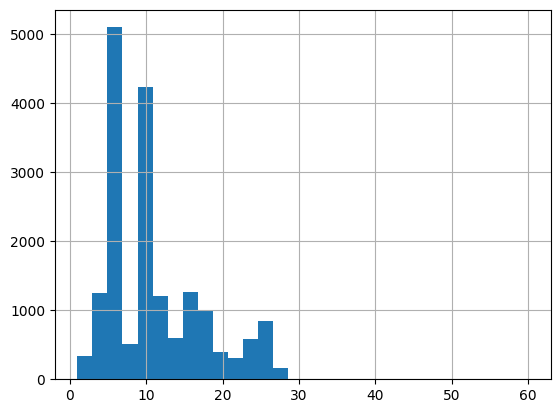

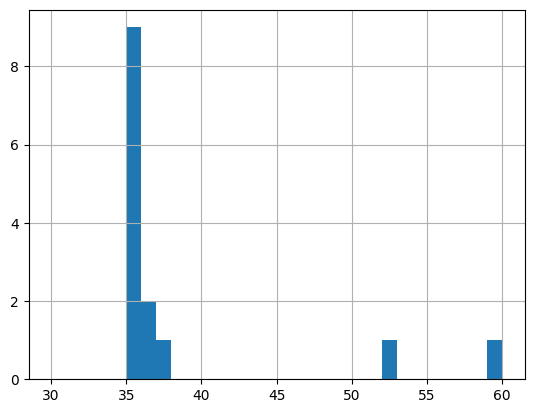

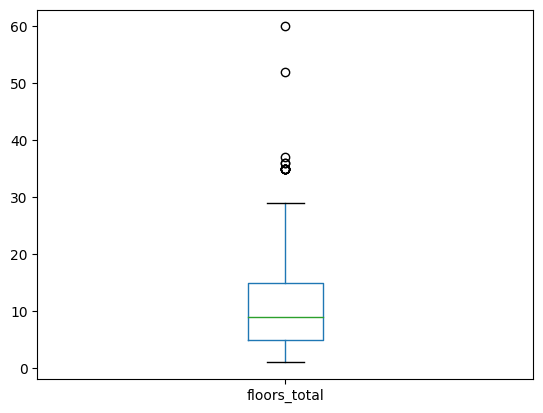

In [49]:
# Изучения параметра "общее количество этажей в доме" - floors_total:
print(df['floors_total'].sort_values(ascending=False).head(20))
print()

df['floors_total'].hist(bins=30)
plt.show()
df['floors_total'].hist(range=(30, 60), bins=30)
plt.show()
df['floors_total'].plot.box()
plt.show()

In [50]:
df['floors_total'].describe()

count    17756.000000
mean        10.556375
std          6.466483
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

In [51]:
# Рассчитаем граничное значение, равное Q3+1.5iqr, после которого начинаются выбросы:
floors_total_iqr = stats.iqr(df['floors_total'])
floors_total_upper = 16 + 1.5*floors_total_iqr
floors_total_lower = 5 - 1.5*floors_total_iqr
print(f'Межквартильный размах: {floors_total_iqr}')
print(f'Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: {floors_total_upper}')
print(f'Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: {floors_total_lower}, так как данное значение меньше минимального, нижнюю границу принимаем min = 1')

Межквартильный размах: 10.0
Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: 31.0
Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: -10.0, так как данное значение меньше минимального, нижнюю границу принимаем min = 1


In [52]:
df.query('floors_total > 31').sort_values(by='floors_total', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,342.0,3,614.0,166.0,83516.48,3,6,2018,Другой этаж,49.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,793.0,0,NaN,45.0,99450.00,0,9,2018,Другой этаж,13.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,NaN,3,80.0,71.0,102500.00,1,10,2017,Другой этаж,20.0
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,NaN,3,80.0,38.0,101875.00,2,1,2019,Другой этаж,20.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,NaN,3,80.0,NaN,122666.67,4,2,2019,Другой этаж,20.0
871,14,7777777.0,75.0,2017-11-16,2,NaN,35,40.5,23,False,...,NaN,3,80.0,169.0,103703.69,3,11,2017,Другой этаж,20.0
2966,9,4300000.0,37.0,2017-08-08,1,NaN,35,14.0,15,False,...,NaN,3,80.0,50.0,116216.22,1,8,2017,Другой этаж,20.0
4855,12,5500000.0,50.0,2017-06-22,1,2.80,35,22.0,4,False,...,609.0,3,145.0,537.0,110000.00,3,6,2017,Другой этаж,20.0
5808,12,4590000.0,43.0,2018-10-19,1,NaN,35,14.0,11,False,...,NaN,3,80.0,82.0,106744.19,4,10,2018,Другой этаж,20.0
7236,10,4599000.0,42.0,2019-01-10,1,NaN,35,15.0,12,False,...,NaN,3,80.0,72.0,109500.00,3,1,2019,Другой этаж,20.0


In [53]:
#удаление аномальных значений из датафрейма:
df = df.query('floors_total <= 31')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17742 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17742 non-null  int64         
 1   last_price            17742 non-null  float64       
 2   total_area            17742 non-null  float64       
 3   first_day_exposition  17742 non-null  datetime64[ns]
 4   rooms                 17742 non-null  int64         
 5   ceiling_height        11148 non-null  float64       
 6   floors_total          17742 non-null  int32         
 7   living_area           17742 non-null  float64       
 8   floor                 17742 non-null  int64         
 9   is_apartment          17742 non-null  bool          
 10  studio                17742 non-null  bool          
 11  open_plan             17742 non-null  bool          
 12  kitchen_area          17742 non-null  float64       
 13  balcony         

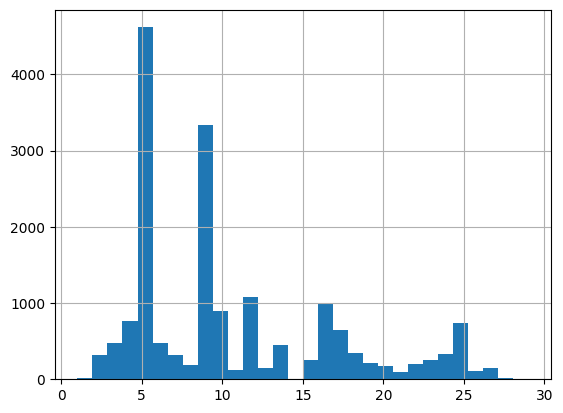

In [54]:
# гистограмма по обновленнымм данным:
df['floors_total'].hist(bins=30)
plt.show()

**Вывод по параметру `общее количество этажей в доме`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `31` этажей. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Соответственно, было произведено удаление `14` значений по данному параметру из датафрейма. 

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
11244    59052.0
939      56745.0
376      54926.0
22855    54214.0
8862     53568.0
18096    53568.0
17683    53383.0
20191    53379.0
1556     53294.0
3936     53177.0
Name: cityCenters_nearest, dtype: float64



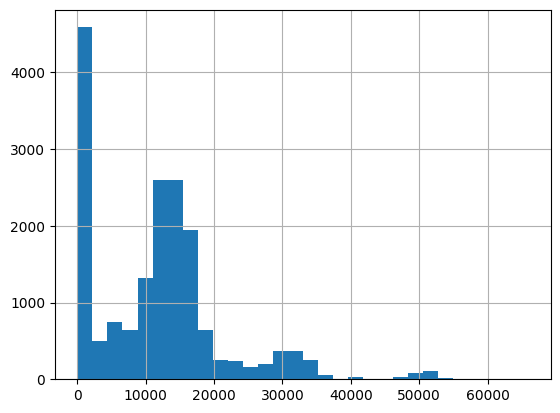

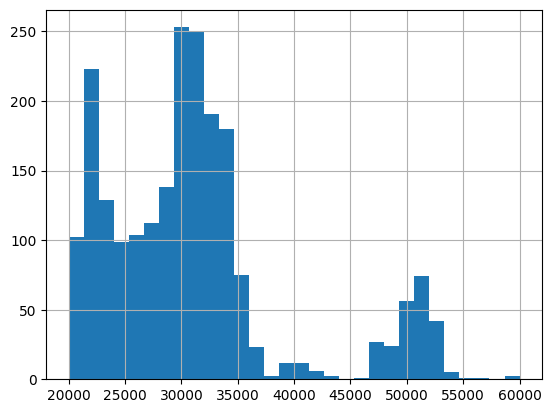

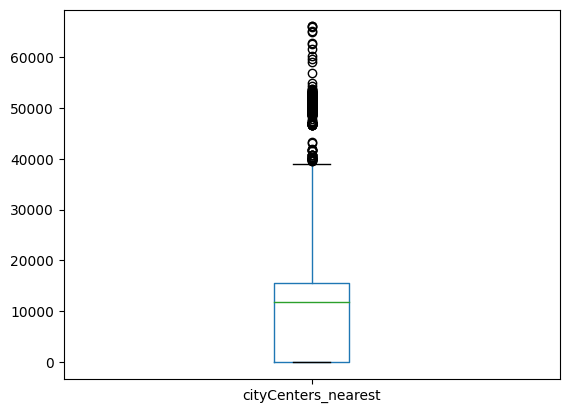

(-1000.0, 40000.0)

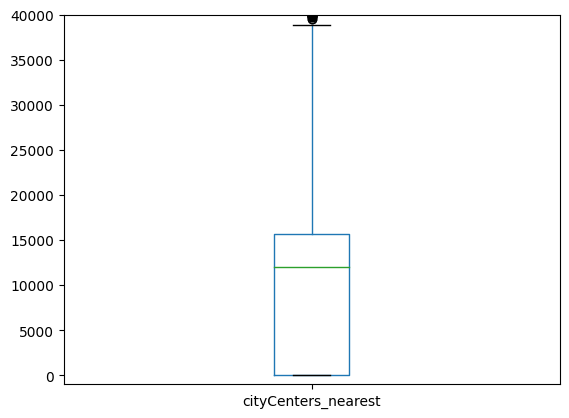

In [55]:
# Изучения параметра "расстояние до центра города в метрах" - cityCenters_nearest:
print(df['cityCenters_nearest'].sort_values(ascending=False).head(20))
print()

df['cityCenters_nearest'].hist(bins=30)
plt.show()
df['cityCenters_nearest'].hist(range=(20000, 60000), bins=30)
plt.show()
df['cityCenters_nearest'].plot.box()
plt.show()
df['cityCenters_nearest'].plot.box()
plt.ylim(-1000, 40000)

In [56]:
df['cityCenters_nearest'].describe()

count    17742.000000
mean     11502.299290
std       9973.909796
min          0.000000
25%          0.000000
50%      11941.000000
75%      15669.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [57]:
# Рассчитаем граничное значение, равное Q3+1.5iqr, после которого начинаются выбросы:
cityCenters_nearest_iqr = stats.iqr(df['cityCenters_nearest'])
cityCenters_nearest_upper = 15717 + 1.5*cityCenters_nearest_iqr
cityCenters_nearest_lower =  0
print(f'Межквартильный размах: {cityCenters_nearest_iqr}')
print(f'Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: {cityCenters_nearest_upper}')
print(f'Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: {cityCenters_nearest_lower}')

Межквартильный размах: 15669.0
Верхняя граница значения параметра, после которой все полученные результаты можно считать выбросами: 39220.5
Нижняя граница значения параметра, до которой все полученные результаты можно считать выбросами: 0


In [58]:
df.query('cityCenters_nearest > @cityCenters_nearest_upper').sort_values(by='cityCenters_nearest', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,False,...,NaN,0,NaN,1194.0,81712.06,2,12,2014,Другой этаж,66.0
5340,19,3600000.0,50.6,2019-03-19,2,2.50,5,29.9,4,False,...,NaN,0,NaN,NaN,71146.25,1,3,2019,Другой этаж,66.0
577,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,NaN,0,NaN,NaN,67796.61,6,7,2017,Первый этаж,66.0
20746,1,3300000.0,43.5,2016-02-16,2,2.55,4,27.2,2,False,...,NaN,0,NaN,1043.0,75862.07,1,2,2016,Другой этаж,65.0
5218,15,3650000.0,53.8,2018-09-24,3,2.50,4,36.9,3,False,...,NaN,0,NaN,121.0,67843.87,0,9,2018,Другой этаж,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13516,4,2650000.0,31.0,2018-03-10,1,2.70,4,18.1,1,False,...,NaN,0,NaN,60.0,85483.87,5,3,2018,Первый этаж,40.0
15410,12,5500000.0,78.6,2018-03-29,3,3.30,4,54.9,4,False,...,NaN,0,NaN,NaN,69974.55,3,3,2018,Последний этаж,40.0
641,5,2699000.0,44.0,2016-01-25,2,NaN,5,28.5,1,False,...,NaN,0,NaN,294.0,61340.91,0,1,2016,Первый этаж,40.0
4596,14,3350000.0,40.3,2018-11-07,2,2.55,5,22.6,5,False,...,NaN,0,NaN,NaN,83126.55,2,11,2018,Последний этаж,39.0


In [59]:
#удаление аномальных значений из датафрейма:
df = df.query('cityCenters_nearest <= @cityCenters_nearest_upper')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17469 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17469 non-null  int64         
 1   last_price            17469 non-null  float64       
 2   total_area            17469 non-null  float64       
 3   first_day_exposition  17469 non-null  datetime64[ns]
 4   rooms                 17469 non-null  int64         
 5   ceiling_height        10957 non-null  float64       
 6   floors_total          17469 non-null  int32         
 7   living_area           17469 non-null  float64       
 8   floor                 17469 non-null  int64         
 9   is_apartment          17469 non-null  bool          
 10  studio                17469 non-null  bool          
 11  open_plan             17469 non-null  bool          
 12  kitchen_area          17469 non-null  float64       
 13  balcony         

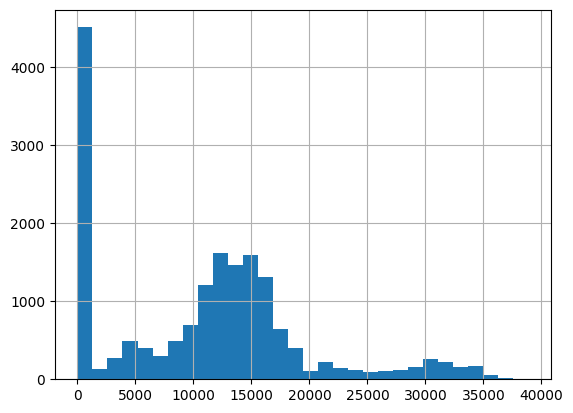

In [60]:
#гистограмма по обновленнымм данным:
df['cityCenters_nearest'].hist(bins=30)
plt.show()

**Вывод по параметру `расстояние до центра города в метрах`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `39220` метров. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было. По условиям кейса, если выявить ошибки в данных и устранить их не удалось, аномальные значения подлежат удалению. Соответственно, было произведено удаление `273` значений по данному параметру из датафрейма. 

10959    3190.0
19430    3190.0
1590     3064.0
23080    2984.0
1860     2888.0
7855     2880.0
7316     2747.0
5923     2711.0
6625     2633.0
18327    2555.0
18685    2532.0
8393     2467.0
18488    2427.0
15842    2416.0
20063    2416.0
2488     2348.0
9755     2295.0
12751    2295.0
15560    2295.0
11490    2295.0
Name: parks_nearest, dtype: float64



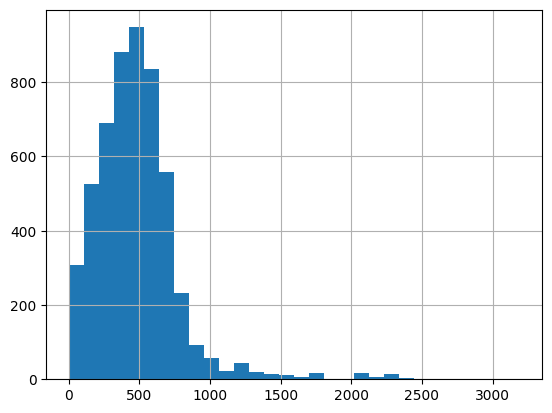

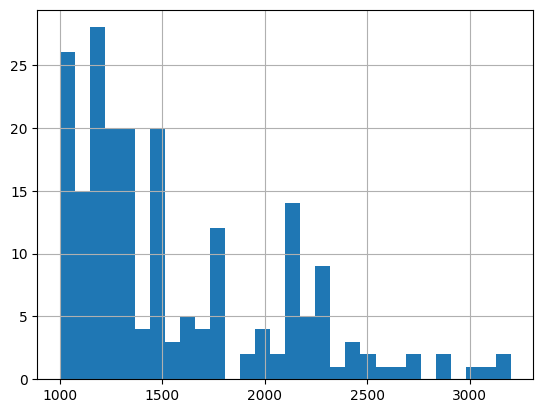

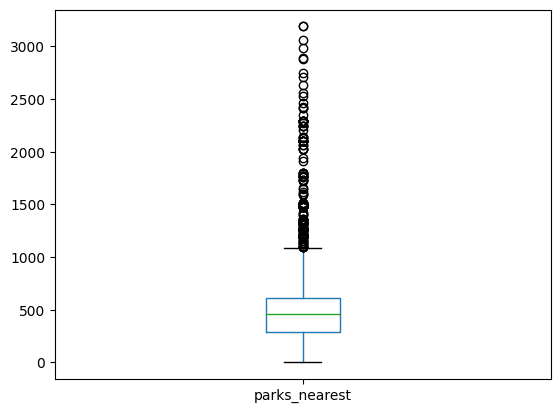

(-10.0, 1150.0)

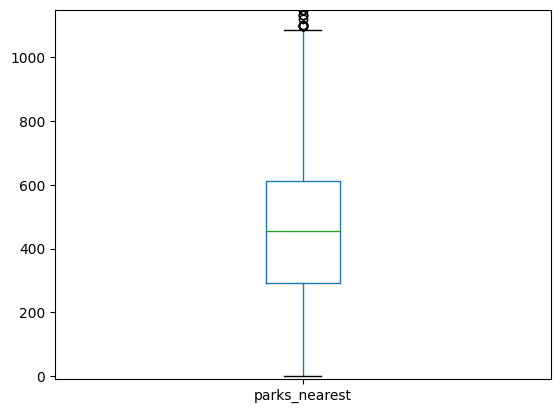

In [61]:
# Изучения параметра "расстояние до ближайшего парка" - parks_nearest:
print(df['parks_nearest'].sort_values(ascending=False).head(20))
print()

df['parks_nearest'].hist(bins=30)
plt.show()
df['parks_nearest'].hist(range=(1000, 3200), bins=30)
plt.show()
df['parks_nearest'].plot.box()
plt.show()
df['parks_nearest'].plot.box()
plt.ylim(-10, 1150)

In [62]:
df['parks_nearest'].describe()

count    5314.000000
mean      485.095032
std       316.072448
min         1.000000
25%       293.250000
50%       456.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Вывод по параметру `расстояние до ближайшего парка`:** по построенной гистограмме и диаграмме размаха, видно, что выбросы начинаются с отметки `1050` метров. При отборе значений, которые находятся выше заданной отметки, методом query, общей закономерности в аномальных значениях или каких-либо несоответствий найдено не было, поэтому в связи с условиями данного кейса значения необходимо удалить. Тем не менее, в датафрейме по данному параметру слишком много пропущенных значений, удаление строк с которыми приведет к утере важных данных, поэтому было принято решение оставить строки с выбросами. 

#### 2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

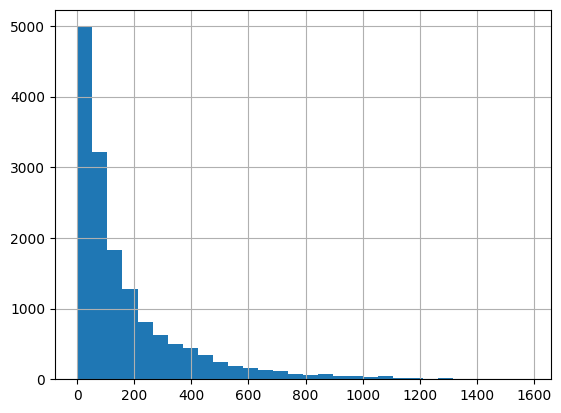

In [63]:
df['days_exposition'].hist(bins=30)
plt.show()

In [64]:
days_median = df['days_exposition'].median()
days_mean = df['days_exposition'].mean()
print(f'Медианное значение параметра "количество дней, которое было размещено каждое объявление": {days_median}')
print(f'Среднее значение параметра "количество дней, которое было размещено каждое объявление": {days_median}')

Медианное значение параметра "количество дней, которое было размещено каждое объявление": 95.0
Среднее значение параметра "количество дней, которое было размещено каждое объявление": 95.0


In [65]:
df['days_exposition'].sort_values(ascending=False)

18843    1580.0
6691     1512.0
19123    1485.0
4736     1477.0
6006     1452.0
          ...  
23651       NaN
23674       NaN
23680       NaN
23683       NaN
23698       NaN
Name: days_exposition, Length: 17469, dtype: float64

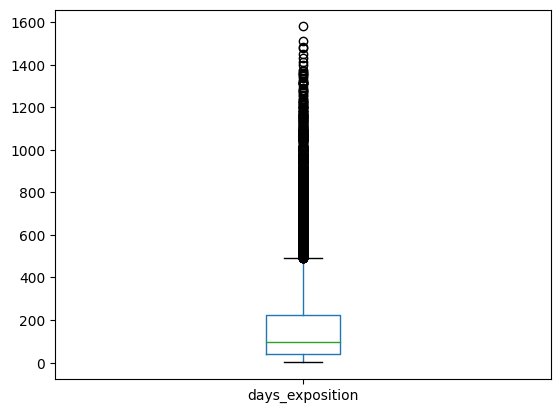

In [66]:
# Проверим, какое количество дней можно считать за слишком долгую продажу и слишком быструю продажу:
df['days_exposition'].plot.box()
plt.show()

In [67]:
df['days_exposition'].describe()

count    15330.000000
mean       173.360209
std        208.206494
min          1.000000
25%         42.000000
50%         95.000000
75%        222.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [68]:
df.query('days_exposition > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,Другой этаж,14.0
17,6,4180000.0,36.0,2016-09-09,1,NaN,17,16.5,7,False,...,NaN,1,859.0,571.0,116111.11,4,9,2016,Другой этаж,15.0
23,11,2950000.0,32.0,2016-10-29,1,2.60,9,17.7,9,False,...,517.0,1,190.0,615.0,92187.50,5,10,2016,Последний этаж,14.0
40,9,3590000.0,36.0,2017-03-15,1,2.60,26,15.0,22,False,...,NaN,0,NaN,430.0,99722.22,2,3,2017,Другой этаж,19.0
43,13,9330000.0,48.0,2017-01-10,2,3.00,4,28.0,4,False,...,NaN,1,492.0,763.0,194375.00,1,1,2017,Последний этаж,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000.0,110.0,2015-12-10,4,3.36,7,64.6,5,False,...,417.0,1,118.0,816.0,81818.18,3,12,2015,Другой этаж,5.0
23672,5,3000000.0,30.8,2016-06-08,1,NaN,5,16.1,3,False,...,258.0,0,NaN,808.0,97402.60,2,6,2016,Другой этаж,14.0
23675,8,3550000.0,39.5,2016-10-03,1,NaN,16,19.0,13,False,...,NaN,0,NaN,721.0,89873.42,0,10,2016,Другой этаж,15.0
23691,11,9470000.0,72.9,2016-10-13,2,2.75,25,40.3,7,False,...,NaN,1,806.0,519.0,129903.98,3,10,2016,Другой этаж,4.0


In [69]:
# Также из графика "boxplot" видно, что совсем редкие выбросы находятся где-то около значения 1400, проверим, сколько таких объявлений:
df.query('days_exposition > 1400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_cost,sales_day,sales_month,sales_year,floor_type,cityCenter_km
4736,11,6650000.0,68.30,2015-02-19,4,2.63,5,45.10,4,False,...,606.0,3,453.0,1477.0,97364.57,3,2,2015,Другой этаж,2.0
6006,4,4400000.0,38.63,2015-02-03,1,2.85,25,15.00,6,False,...,NaN,0,NaN,1452.0,113901.11,1,2,2015,Другой этаж,19.0
6691,3,4400000.0,42.98,2014-12-12,1,NaN,5,18.72,1,False,...,439.0,3,232.0,1512.0,102373.20,4,12,2014,Первый этаж,30.0
14873,5,6400000.0,70.00,2015-02-19,4,3.10,5,56.70,3,False,...,273.0,1,753.0,1430.0,91428.57,3,2,2015,Другой этаж,3.0
18843,11,3500000.0,48.20,2014-12-15,2,2.50,5,27.40,2,False,...,NaN,0,NaN,1580.0,72614.11,0,12,2014,Другой этаж,0.0
19123,9,5990000.0,82.00,2015-02-19,3,3.00,4,60.00,2,False,...,NaN,2,458.0,1485.0,73048.78,3,2,2015,Другой этаж,35.0
20996,10,3400000.0,54.60,2014-12-10,2,2.50,5,29.70,1,False,...,NaN,0,NaN,1413.0,62271.06,2,12,2014,Первый этаж,0.0


##### Вывод по пункту 4.2:
**Таким образом**, продажа обычно занимает `95 дней`, быстрыми продажами можно считать все продажи `от 1 до 42 дней` (от минимального значения до Q1), долгими - `от 222 дней до 1580`. По графику boxplot также выделяются помещения, которые простояли на продаже более `1400 дней`, таких всего `7`.

#### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Коэффициент корреляции Пирсона для величин last_price и total_area: 0.647211629292649


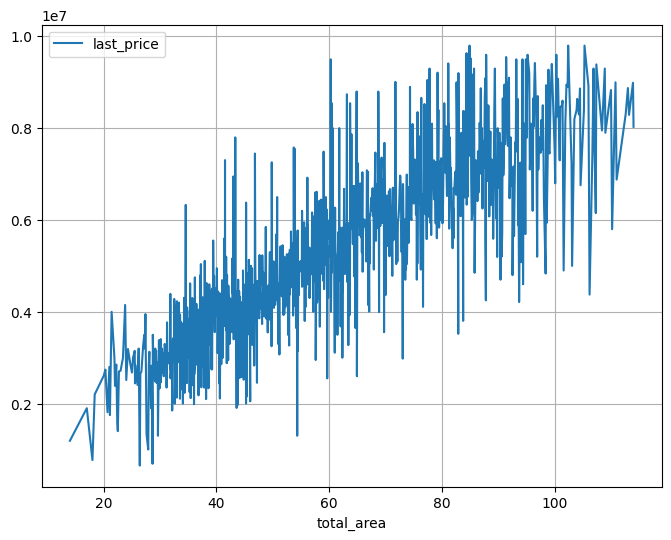

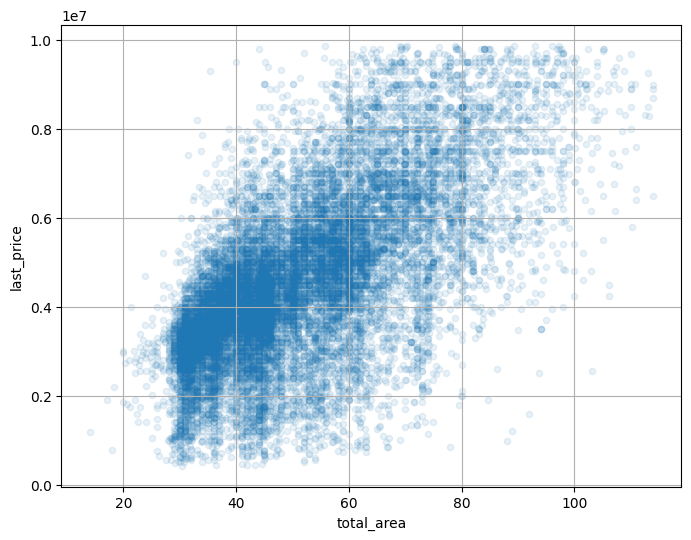

In [70]:
# 1) Изучим зависимость параметра last_price от total_area:
cost_by_total_area = df.pivot_table(index='total_area', values='last_price')
cost_by_total_area_corr = df['last_price'].corr(df['total_area'])
print(f'Коэффициент корреляции Пирсона для величин last_price и total_area: {cost_by_total_area_corr}')
cost_by_total_area.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

Коэффициент корреляции Пирсона для величин last_price и living_area: 0.5279790717546967


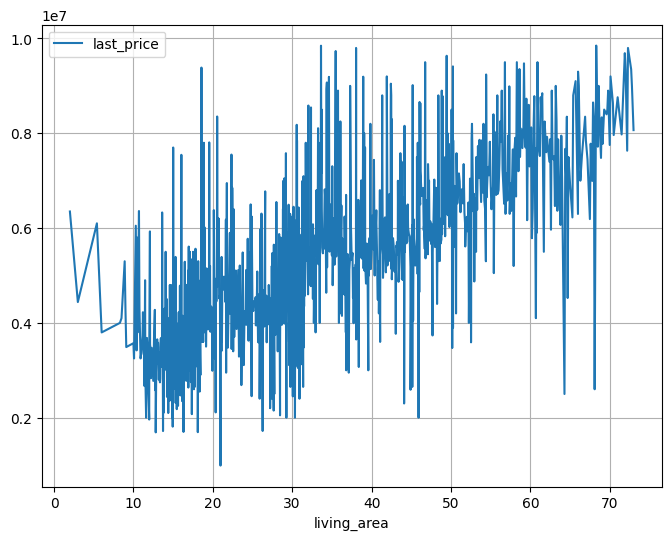

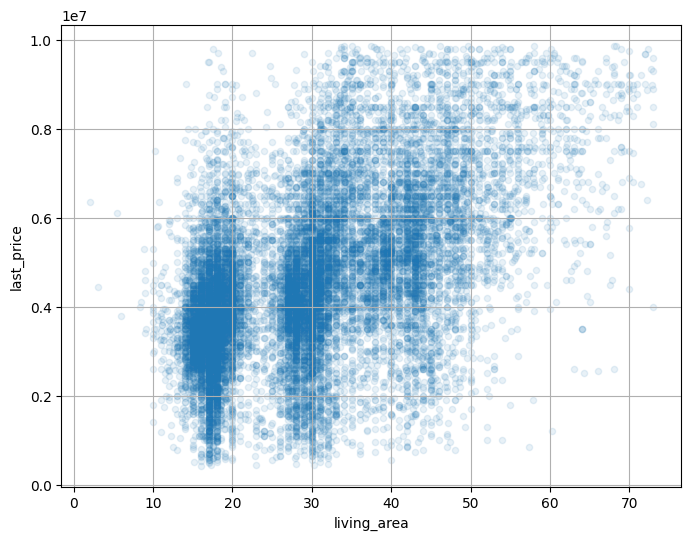

In [71]:
# 2) Изучим зависимость параметра last_price от living_area:
cost_by_living_area = df.pivot_table(index='living_area', values='last_price')
cost_by_living_area_corr = df['last_price'].corr(df['living_area'])
print(f'Коэффициент корреляции Пирсона для величин last_price и living_area: {cost_by_living_area_corr}')
cost_by_living_area.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

Коэффициент корреляции Пирсона для величин last_price и kitchen_area: 0.4372551351296769


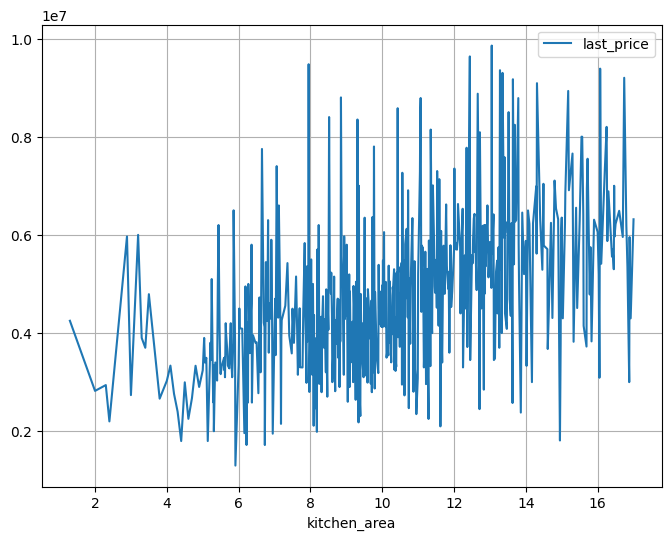

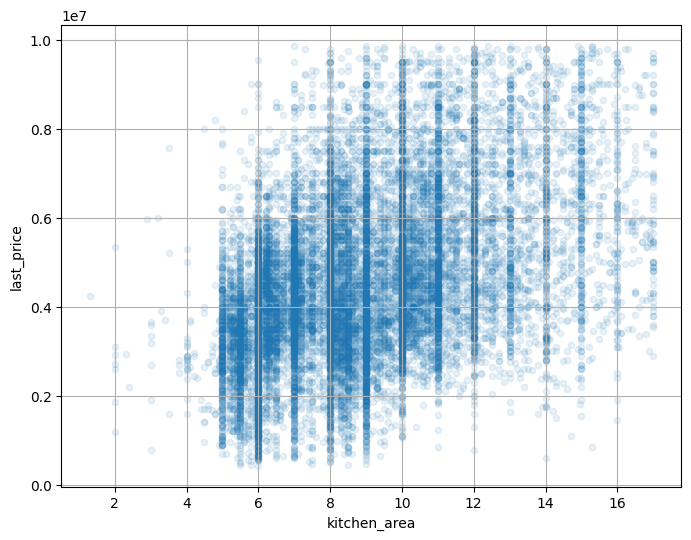

In [72]:
# 3) Изучим зависимость параметра last_price от kitchen_area:
cost_by_kitchen_area = df.pivot_table(index='kitchen_area', values='last_price')
cost_by_kitchen_area_corr = df['last_price'].corr(df['kitchen_area'])
print(f'Коэффициент корреляции Пирсона для величин last_price и kitchen_area: {cost_by_kitchen_area_corr}')
cost_by_kitchen_area.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

Коэффициент корреляции Пирсона для величин last_price и rooms: 0.41640107346075766


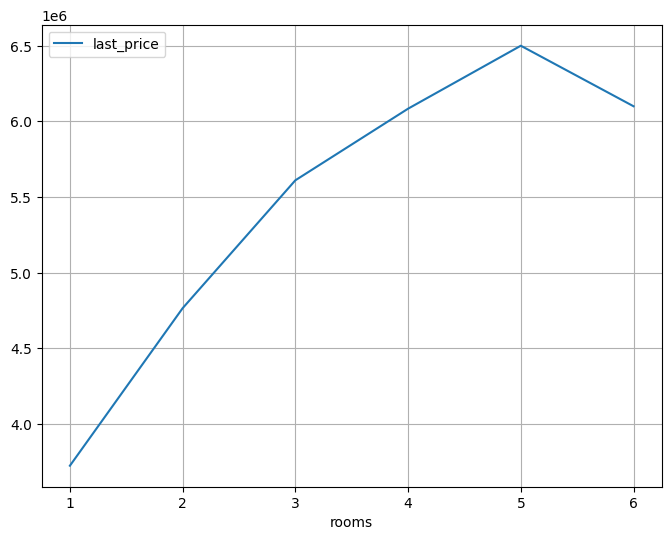

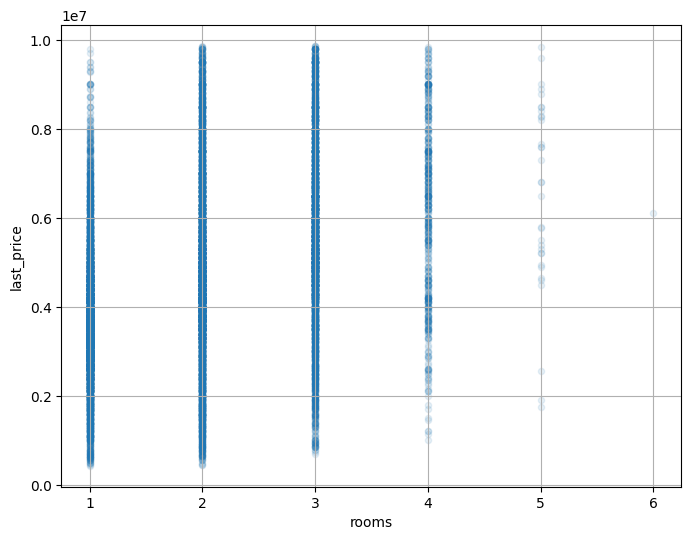

In [73]:
# 4) Изучим зависимость параметра last_price от rooms:
cost_by_rooms = df.pivot_table(index='rooms', values='last_price')
cost_by_rooms_corr = df['last_price'].corr(df['rooms'])
print(f'Коэффициент корреляции Пирсона для величин last_price и rooms: {cost_by_rooms_corr}')
cost_by_rooms.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='rooms', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

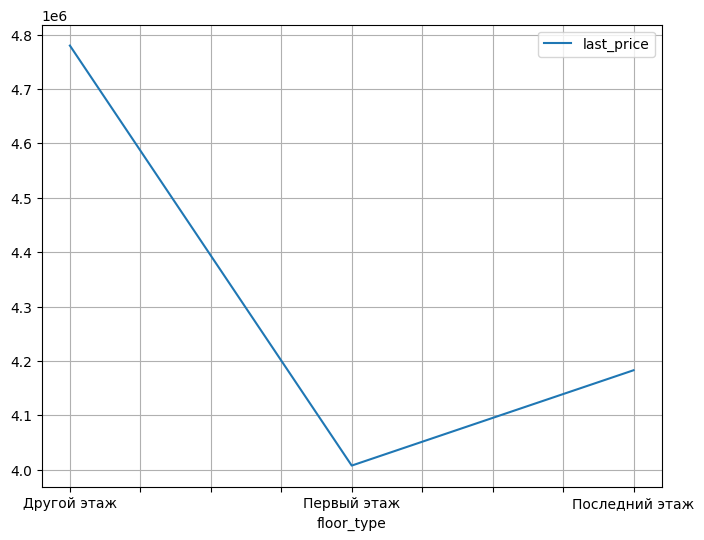

In [74]:
# 5) Изучим зависимость параметра last_price от floor_type:
cost_by_floor_type = df.pivot_table(index='floor_type', values='last_price')
cost_by_floor_type.plot(grid=True, figsize=(8, 6))
plt.show()

Коэффициент корреляции Пирсона для величин last_price и sales_day: -0.010595027722495208


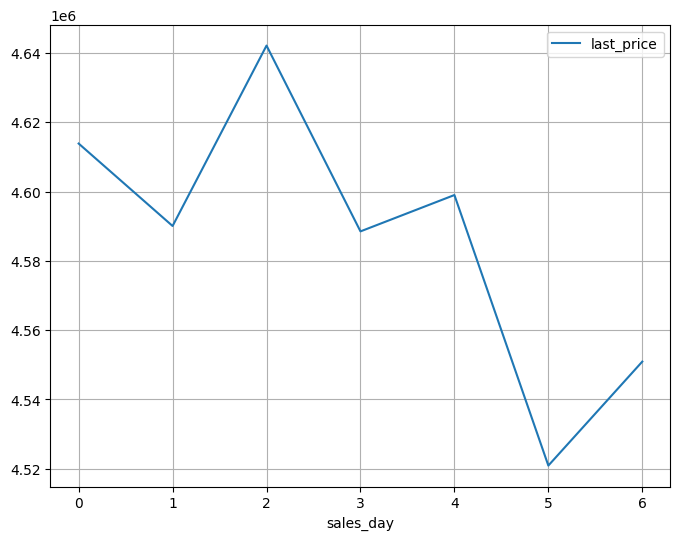

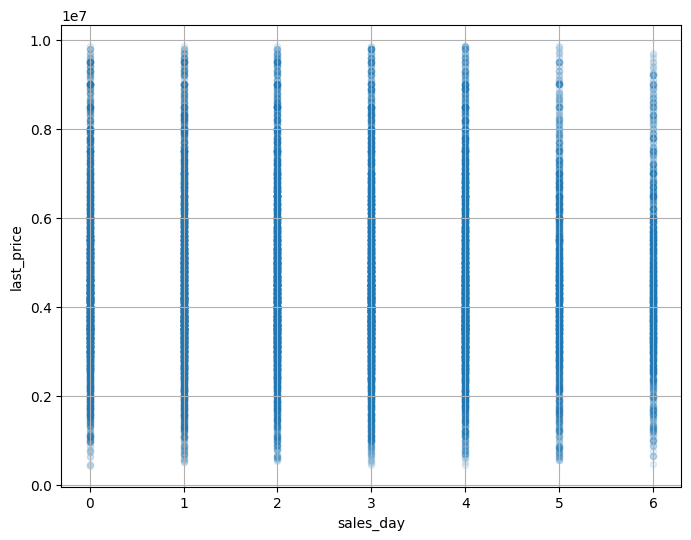

In [75]:
# 6) Изучим зависимость параметра last_price от sales_day:
cost_by_sales_day = df.pivot_table(index='sales_day', values='last_price')
cost_by_sales_day_corr = df['last_price'].corr(df['sales_day'])
print(f'Коэффициент корреляции Пирсона для величин last_price и sales_day: {cost_by_sales_day_corr}')
cost_by_sales_day.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='sales_day', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

Коэффициент корреляции Пирсона для величин last_price и sales_month: -0.0008282899068969723


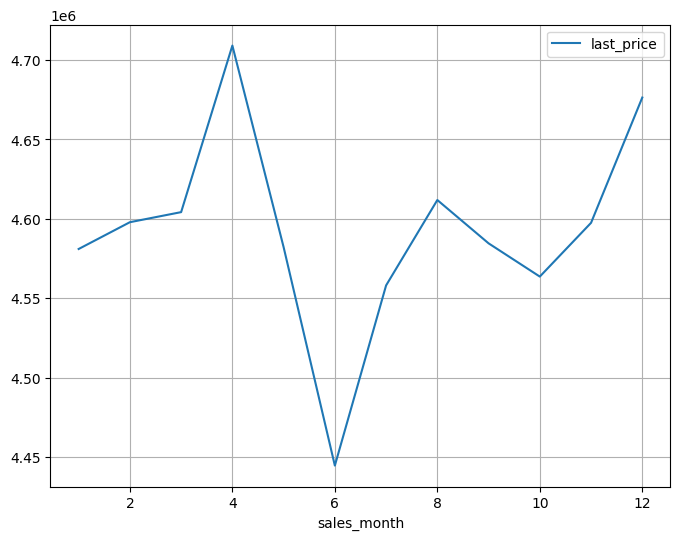

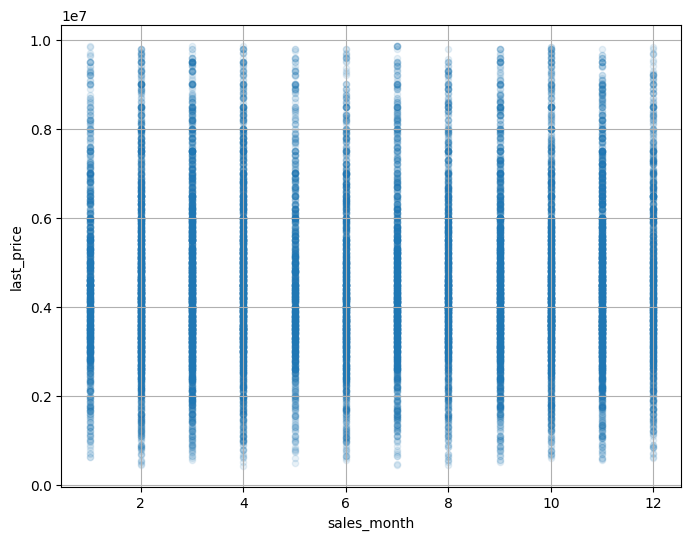

In [76]:
# 7) Изучим зависимость параметра last_price от sales_month:
cost_by_sales_month = df.pivot_table(index='sales_month', values='last_price')
cost_by_sales_month_corr = df['last_price'].corr(df['sales_month'])
print(f'Коэффициент корреляции Пирсона для величин last_price и sales_month: {cost_by_sales_month_corr}')
cost_by_sales_month.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='sales_month', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

Коэффициент корреляции Пирсона для величин last_price и sales_day: 0.029525686911497755


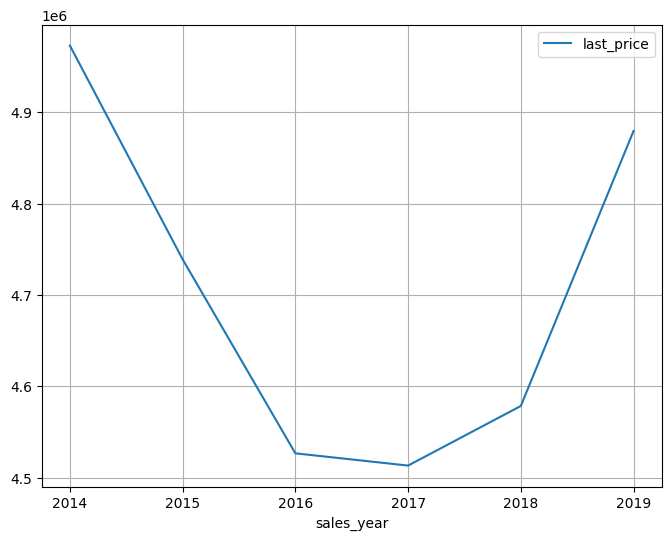

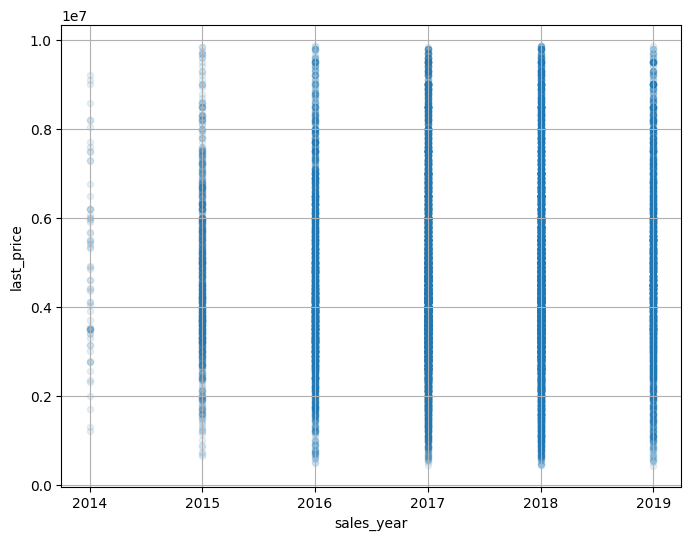

In [77]:
# 8) Изучим зависимость параметра last_price от sales_year:
cost_by_sales_year = df.pivot_table(index='sales_year', values='last_price')
cost_by_sales_year_corr = df['last_price'].corr(df['sales_year'])
print(f'Коэффициент корреляции Пирсона для величин last_price и sales_day: {cost_by_sales_year_corr}')
cost_by_sales_year.plot(grid=True, figsize=(8, 6))
plt.show()
df.plot(x='sales_year', y='last_price', kind='scatter', figsize=(8,6), grid=True, alpha=0.1)
plt.show()

##### Вывод по пункту 4.3:
1) Поиск линейной зависимости между величинами с помощью коэффициента корреляции Пирсона:
Для трактовки полученных коэффициентов корреляции Пирсона между парами факторов, необходимо воспользоваться шкалой Чеддока. Она определяет тесноту связи следующим образом: 0 – полное отсутствие связи; 0 – 0.3 – очень слабая; 0.3 – 0.5 – слабая; 0.5 – 0.7 – средняя; 0.7 – 0.9 – высокая; 0.9 – 1 – очень высокая. По итогам исследования только четыре пары параметров проявили признаки наличия между ними линейной связи: слабая у пар параметров `last_price - living_area`, `last_price - kitchen_area`, `last_price - rooms`, средняя у пары параметров `last_price - total_area`. Таким образом, для выводов по зависимости цены жилища от ряда параметров был использован визуальный способ (с помощью построения графиков).
2) Поиск зависимости между ценой жилища и другими параметрами по построенным графикам:
По графикам удалось определить, что цена больше всего зависит от таких параметров, как total_area и living_area (чем больше площадь, тем больше цена), rooms (чем больше комнат, тем больше цена), sales_year (данную зависимость можно объяснить, например, курсом рубля в разные годы), и практически не зависит от таких параметров, как floor_type, sales_day, sales_month.

#### 4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [78]:
highest_adv_locality_count = df.groupby('locality_name').agg({'total_area':'count', 'square_cost':'median'}).sort_values(by='total_area', ascending=False)
print(f'Топ-10 населенных пунктов с наибольшим количеством объявлений: \n{highest_adv_locality_count.head(10)}')

Топ-10 населенных пунктов с наибольшим количеством объявлений: 
                   total_area  square_cost
locality_name                             
Санкт-Петербург         11191   100600.600
посёлок Мурино            415    84968.750
посёлок Шушары            382    77223.320
Всеволожск                340    65594.695
Колпино                   312    74689.875
Пушкин                    283    97590.360
Гатчина                   283    67647.060
посёлок Парголово         276    92487.500
деревня Кудрово           202    92076.100
Выборг                    176    58133.215


**Вывод по пункту 4.4:** Наибольшая средняя стоимость одного квадратного метра площади жилища составляет `100600.6` рублей за квадратный метр в `Санкт-Петербурге`. Наименьшая средняя стоимость одного квадратного метра площади жилища составляет `58133.215` рублей за квадратный метр в `Выборге` среди топ-10 городов по количеству объявлений. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Лучше не хардкодить, а использовать группировку (Не станем мы писать 50 районов, если нужно будет найти ТОП-50). Можно использовать, например, вот такую конструкцию:
    
    df.groupby('что группируем').agg({'столбец по котому считаем':'count', 'цена':'median'})
</div>

<div class="alert alert-info"> <b>Комментарий:</b> Исправлено </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

После составления сводной таблицу, её нужно отсортиьровать по кол-ву объясвлений, и уже выводить ТОП-10.
    
Чтобы избежать ошибок, рекоменую считать кол-во объявлений не по `'locality_name`, а по другому столбцу, который не имеет пропусков

<div class="alert alert-info"> <b>Комментарий студента №2:</b> Исправлено </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__
    
Всё верно

#### 5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

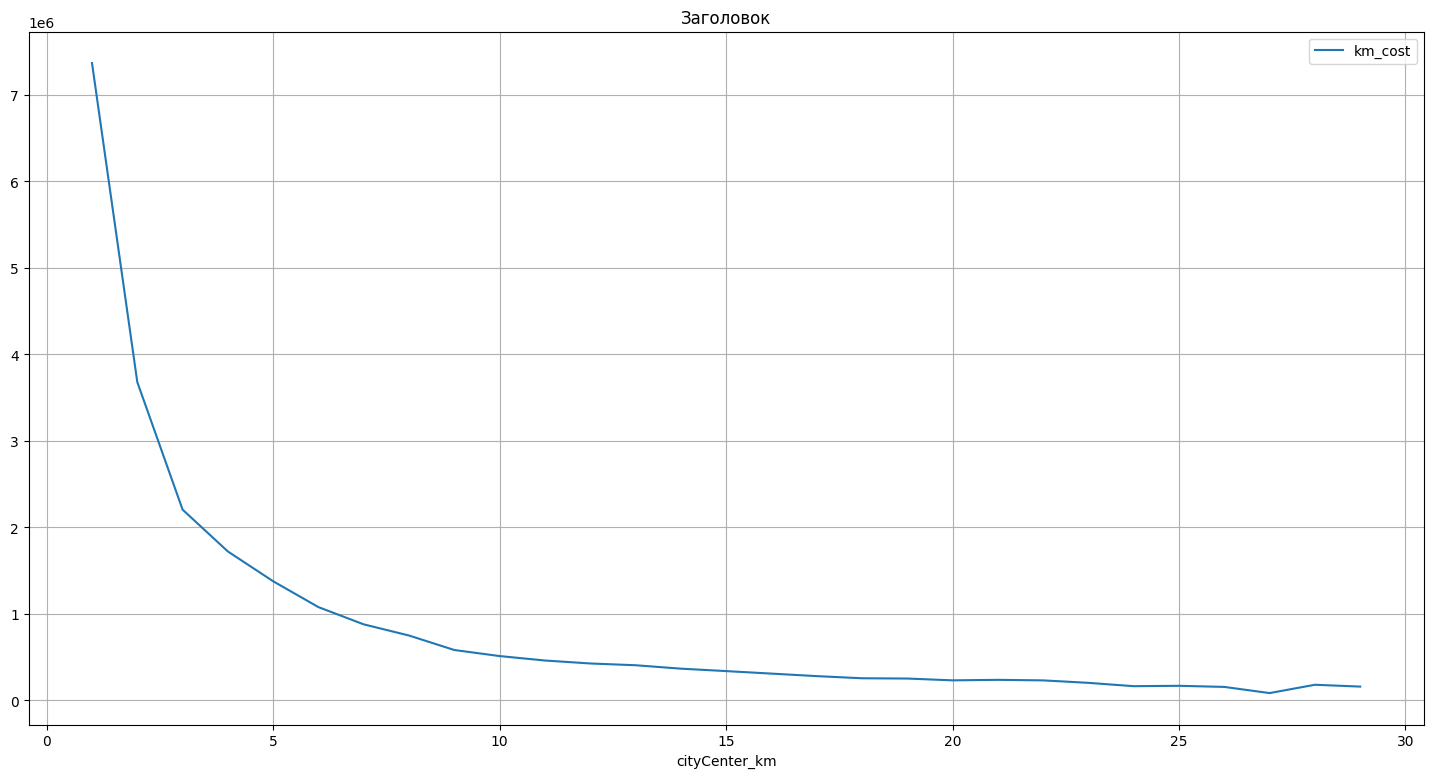

                    km_cost
cityCenter_km              
0.0                     inf
1.0            7.368446e+06
2.0            3.679449e+06
3.0            2.204626e+06
4.0            1.720794e+06
5.0            1.376282e+06
6.0            1.077211e+06
7.0            8.778612e+05
8.0            7.488516e+05
9.0            5.812766e+05
10.0           5.113791e+05
11.0           4.599174e+05
12.0           4.256933e+05
13.0           4.052920e+05
14.0           3.658646e+05
15.0           3.375527e+05
16.0           3.086079e+05
17.0           2.793767e+05
18.0           2.546660e+05
19.0           2.514066e+05
20.0           2.305789e+05
21.0           2.364676e+05
22.0           2.301678e+05
23.0           2.016705e+05
24.0           1.630455e+05
25.0           1.674667e+05
26.0           1.546731e+05
27.0           8.333333e+04
28.0           1.795153e+05
29.0           1.584138e+05


In [79]:
df['km_cost'] = df['last_price'] / df['cityCenter_km']
df_peter = df.query('locality_name == "Санкт-Петербург"')
#print(df_peter['km_cost'])
peter_km_cost_table = df_peter.pivot_table(index='cityCenter_km', values='km_cost')
peter_km_cost_table.plot(grid=True, figsize=(18,9), title = 'Заголовок')
plt.show()
print(peter_km_cost_table)

**Вывод по пункту 4.5:** Из графика средней стоимости километра в зависимости от расстояния от центра Санкт-Петербурга видно, что цена за километр резко возрастает где-то в отметке `3 км от центра`, что логично - чем ближе к центру города, тем больше стоимость одного километра, таким образом, самые дорогие жилища находятся в центре.

### 5. Общий вывод.

Опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

В ходе исследования объявления о продаже квартир необходимо было пройти 3 этапа: <br>
1.	**Предобработку данных**, в рамках которой определилось, какие из представленных величин необходимо обработать и проанализировать. В ходе данного этапа обнаружилось, что нормальное распределение или распределение Пуассона имеют лишь гистограммы `total_area`, `floors_total`, `living_area`, `floor`, `kitchen_area`, `days_explosition`, а для `balcony`, `parks_around3000`, `ponds_around3000` необходимо произвести анализ и заполнение пропущенных значений ввиду того, что их оказалось слишком много.  В ходе работы над данным этапом исследования были сделаны выводы о возможных причинах наличия пропусков и предприняты шаги по их устранению в рамках данного кейса, а также были изменены типы некоторых данных и приведено обоснование, почему это необходимо было сделать;  <br>
2.	**Добавление новых столбцов** для дальнейшей работы с данными, которые были рассчитаны или составлены из уже имеющихся данных; <br>
3.	**Проведение исследовательского анализа данных**, в ходе которого необходимо было решить такие вопросы, как: <br>
•	**Изучение данных**. Были сделаны выводы по всем необходимым для исследования параметрам: построены гистограммы, диаграммы размаха, посчитаны отметки, с которых начинаются выбросы, были отобраны значения и произведено очищение датафрейма от аномальных значений с помощью метода query, если выявить ошибки в данных и устранить их не удавалось; <br>
•	**Подробное изучение скорости продажи жилищ**. В ходе исследования данного вопроса была построена гистограмма, рассчитано среднее значение и медиана. Выяснилось, что продажа обычно занимает `95` дней, быстрыми продажами можно считать все продажи от `1` до `42` дней (от минимального значения до Q1), долгими - от `222` дней до `1580`. По графику boxplot также выделяются помещения, которые простояли на продаже более `1400` дней, таких оказалось всего `7`; <br>
•	**Изучение факторов, которые имеют наибольшее влияние на общую (полную) стоимость объекта**. Был произведен поиск линейной зависимости между виличинами с помощью коэффициента корреляции Пирсона и построены графики зависимости между величинами. По итогам исследования только четыре пары параметров проявили признаки наличия между ними линейной связи: слабая у пар параметров `last_price - living_area`, `last_price - kitchen_area`, `last_price - rooms`, средняя у пары параметров `last_price - total_area`. Таким образом, для выводов по зависимости цены жилища от ряда параметров был использован визуальный способ (с помощью построения графиков). По графикам удалось определить, что цена больше всего зависит от таких параметров, как total_area и living_area (чем больше площадь, тем больше цена), rooms (чем больше комнат, тем больше цена), sales_year (данную зависимость можно объяснить, например, курсом рубля в разные годы), и практически не зависит от таких параметров, как floor_type, sales_day, sales_month. <br>
•	**Расчет средней цены квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**. В результате исследования наибольшая средняя стоимость одного квадратного метра площади жилища составила `100600.6` рублей за квадратный метр в `Санкт-Петербурге`. Наименьшая средняя стоимость одного квадратного метра площади жилища составила `58133.215` рублей за квадратный метр в `Выборге` среди топ-10 городов по количеству объявлений. <br>
•	**Расчет средней цены каждого километра стоимости жилищ в Санкт-Петербурге**. Из графика средней стоимости километра в зависимости от расстояния от центра Санкт-Петербурга стало видно, что цена за километр резко возрастает где-то в отметке `3` км от центра, что логично - чем ближе к центру города, тем больше стоимость одного километра, таким образом, самые дорогие жилища находятся в центре. <br>
Таким образом, в результате проведенного исследования были выделены параметры, которые оказывают наибольшее влияние на стоимость жилища, а также было решено несколько прикладных задач на основе полученных данных.


### Чек-лист готовности проекта.

`**Необходимо проставить Х в ячейках, задание которых успешно выполнено:**`

- [X]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения там, где это возможно
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  устранены неявные дубликаты в названиях населённых пунктов
- [X]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [X]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [X]  посчитано и добавлено в таблицу: месяц публикации объявления
- [X]  посчитано и добавлено в таблицу: год публикации объявления
- [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [X]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод